In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import scipy.stats as st
import os
import glob

from DR_analysis_utils import Session, makePSTH, make_neuron_time_trials_tensor 
from DR_analysis_utils import compute_smoothed_response_rate, compute_block_modulation

%matplotlib notebook

In [5]:
main_paths = [
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220815\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220816\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220817\processed",
    
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230123\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230124\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230125\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230126\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_644864_20230130\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_644864_20230131\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_644864_20230201\processed", 
    r"\\allen\programs\mindscope\workgroups\np-exp\PilotEphys\Task 2 pilot\DRpilot_644864_20230202\processed",
#     r"\\allen\programs\mindscope\workgroups\np-exp\PilotEphys\Task 2 pilot\DRpilot_644866_20230207\processed", 
    r"Y:\DRpilot_644866_20230208\processed",
    r"Y:\DRpilot_644866_20230209\processed",
    r"Y:\DRpilot_644866_20230210\processed",
    r"Y:\DRpilot_644867_20230220\processed",
    r"Y:\DRpilot_644867_20230221\processed",
    r"Y:\DRpilot_644867_20230222\processed",
    r"Y:\DRpilot_644867_20230223\processed",
    r"Y:\DRpilot_649943_20230213\processed", 
    r"Y:\DRpilot_649943_20230214\processed",
    r"Y:\DRpilot_649943_20230215\processed",
    r"Y:\DRpilot_649943_20230216\processed",   
]


In [6]:
# load sessions + facemap info
sessions={}
keep_n_SVDs=50

for mi,mm in enumerate(main_paths):
    sessions[mi]=Session(path=mm)
    sessions[mi].assign_unit_areas()
    sessions[mi]=compute_smoothed_response_rate(sessions[mi])
    
    behav_path=glob.glob(os.path.join(mm,"Behavior_*.npy"))[0]
    cam_frames_path = os.path.join(mm,"camera_frames.pkl")
    
    behav_info=np.load(behav_path,allow_pickle=True)
    with open(cam_frames_path, 'rb') as filepath:
        cam_frames=pickle.load(filepath)
        
    sessions[mi].cam_frames=cam_frames
    sessions[mi].facemap_info={}
    sessions[mi].facemap_info['avgframe_reshape']=behav_info.item()['avgframe_reshape']
    sessions[mi].facemap_info['avgmotion_reshape']=behav_info.item()['avgmotion_reshape']
    sessions[mi].facemap_info['motion']=behav_info.item()['motion'][1]
    sessions[mi].facemap_info['motMask_reshape']=behav_info.item()['motMask_reshape'][1][:,:,:keep_n_SVDs]
#     sessions[mi].facemap_info['movMask_reshape']=behav_info.item()['movMask_reshape']
    sessions[mi].facemap_info['motSVD']=behav_info.item()['motSVD'][1][:,:keep_n_SVDs]
#     sessions[mi].facemap_info[]=behav_info.item()

    

probeA areas found
probeB areas found
probeC areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas not found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas not found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas not found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas not found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

In [626]:
# also load decoding analysis results

loadpath=r'C:\Users\ethan.mcbride\OneDrive - Allen Institute\DR decoding results\by_session\use_25_units'

svc_results={}
decoder_results=os.listdir(loadpath)

for ii,ff in enumerate(decoder_results):
    with open(os.path.join(loadpath,ff),'rb') as handle:
        svc_results[ii]=pickle.load(handle)
    print(ff)
    

626791_1decoder_results_200ms_incl_pre_post_all_units.pkl
626791_2decoder_results_200ms_incl_pre_post_all_units.pkl
626791_3decoder_results_200ms_incl_pre_post_all_units.pkl
636766_1decoder_results_200ms_incl_pre_post_all_units.pkl
636766_2decoder_results_200ms_incl_pre_post_all_units.pkl
636766_3decoder_results_200ms_incl_pre_post_all_units.pkl
636766_4decoder_results_200ms_incl_pre_post_all_units.pkl
644864_1decoder_results_200ms_incl_pre_post_all_units.pkl
644864_2decoder_results_200ms_incl_pre_post_all_units.pkl
644864_3decoder_results_200ms_incl_pre_post_all_units.pkl
644864_4decoder_results_200ms_incl_pre_post_all_units.pkl
644866_2decoder_results_200ms_incl_pre_post_all_units.pkl
644866_3decoder_results_200ms_incl_pre_post_all_units.pkl
644866_4decoder_results_200ms_incl_pre_post_all_units.pkl
644867_1decoder_results_200ms_incl_pre_post_all_units.pkl
644867_2decoder_results_200ms_incl_pre_post_all_units.pkl
644867_3decoder_results_200ms_incl_pre_post_all_units.pkl
644867_4decode

In [627]:
session_areas=[]
p='block_ids'
for sel_session in range(0,len(svc_results)):
    session_areas.append(list(svc_results[sel_session][p].keys()))
    
unique_areas=np.unique(np.hstack(session_areas))
unique_areas

array(['', 'ACB', 'AId', 'APN', 'AUDp', 'AUDpo', 'CA1', 'CA3', 'CL', 'CP',
       'DG', 'ILA', 'LD', 'LGd', 'LP', 'LSr', 'MB', 'MGd', 'MGm', 'MGv',
       'MOp', 'MOs', 'MRN', 'ORBm', 'PO', 'POL', 'PoT', 'ProS', 'RSPagl',
       'RSPd', 'RSPv', 'SAG', 'SGN', 'SNr', 'SSp-bfd', 'SSp-m', 'SSp-tr',
       'SSp-ul', 'SSp-un', 'SUB', 'TEa', 'VISa', 'VISal', 'VISam', 'VISl',
       'VISli', 'VISp', 'VISpm', 'VISpor', 'VISrl', 'VPL', 'VPM', 'all'],
      dtype='<U7')

<IPython.core.display.Javascript object>


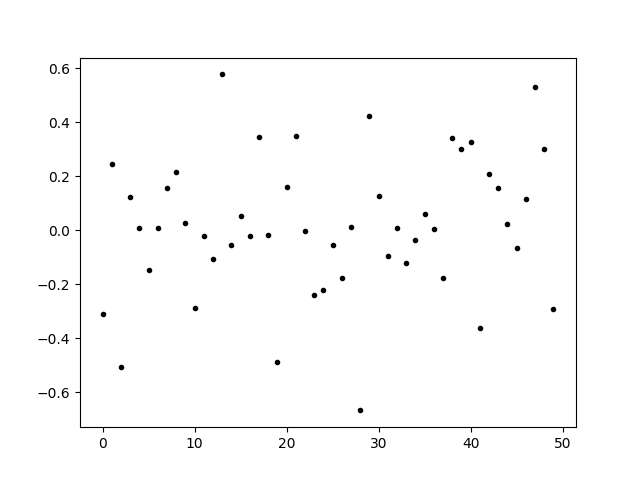

In [813]:
fig,ax=plt.subplots(1,1)
ax.plot(np.mean(np.vstack(svc_results_face[0]['block_ids'][0][0][0]['coefs']),axis=0),'k.')

In [763]:
# make into more plottable format

####change this to deal with multiple #s of trials and average over re-runs of the SVC

plot_results={}
plot_shuffle_results={}
predict_perf={}
predict_perf_shuffle={}
predict_perf_tridx={}
dec_func={}
dec_func_shuffle={}

timepoints=svc_results[0]['time_bins'][1:]

label_list=['vis1','vis2','sound1','sound2','True','False']
# label_list=['vis1','sound1','True','False']

# predict=['stim_ids','block_ids','trial_response']
predict=['block_ids']

# areas=['VISp','AUD','LG','MG','MOs','MRN','CP','MOp']
areas=unique_areas

for sel_session in range(0,len(svc_results)):
    plot_results[sel_session]={}
    plot_shuffle_results[sel_session]={}
    for aa in areas:
        plot_results[sel_session][aa]={}
        plot_shuffle_results[sel_session][aa]={}
        for p in predict:
            plot_results[sel_session][aa][p]={}
            plot_shuffle_results[sel_session][aa][p]={}
            for ll in label_list:
                plot_results[sel_session][aa][p][ll]=np.zeros((len(timepoints),svc_results[sel_session]['n_repeats']))
                plot_results[sel_session][aa][p][ll][:]=np.nan
                
                plot_shuffle_results[sel_session][aa][p][ll]=np.zeros((len(timepoints),svc_results[sel_session]['n_repeats']))
                plot_shuffle_results[sel_session][aa][p][ll][:]=np.nan

decoder_acc_session_mean = {}
decoder_acc_session_shuffle_mean = {}
for aa in areas:
    decoder_acc_session_mean[aa]={}
    decoder_acc_session_shuffle_mean[aa]={}
    for p in predict:
        decoder_acc_session_mean[aa][p]={}
        decoder_acc_session_shuffle_mean[aa][p]={}
        for ll in label_list:
            
            decoder_acc_session_mean[aa][p][ll]=np.zeros((len(timepoints),
                                                           len(svc_results)))
            decoder_acc_session_mean[aa][p][ll][:]=np.nan
            
            decoder_acc_session_shuffle_mean[aa][p][ll]=np.zeros((len(timepoints),
                                                           len(svc_results)))
            decoder_acc_session_shuffle_mean[aa][p][ll][:]=np.nan
        
                
for sel_session in range(0,len(svc_results)):
    for p in predict:
        for aa in areas: 
            if aa in svc_results[sel_session][p].keys():
                for tt,tp in enumerate(timepoints):
                    for nn in range(0,svc_results[sel_session]['n_repeats']):
                        for ll in label_list:
                            if len(svc_results[sel_session][p][aa])>0:
                                if len(svc_results[sel_session][p][aa][tt])>0:
                                    if ll in svc_results[sel_session][p][aa][tt][nn]['cr'].keys():
                                        temp_perf=np.nanmean(svc_results[sel_session][p]
                                                          [aa][tt][nn]['cr'][ll]
                                                          [['precision','recall']].values)
                                        plot_results[sel_session][aa][p][ll][tt,nn]=temp_perf
                                        
                                        temp_shuff_perf=np.nanmean(svc_results[sel_session][p]
                                                          [aa][tt][nn]['shuffle']['cr'][ll]
                                                          [['precision','recall']].values)
                                        plot_shuffle_results[sel_session][aa][p][ll][tt,nn]=temp_shuff_perf

                    for ll in label_list:
                        if len(svc_results[sel_session][p][aa])>0:                    
                            decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
                            decoder_acc_session_mean[aa][p][ll][tt,sel_session] = decoder_acc_mean
    
                            decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
                            decoder_acc_session_shuffle_mean[aa][p][ll][tt,sel_session] = decoder_acc_shuffle_mean
    
    
for sel_session in range(0,len(svc_results)):
    predict_perf[sel_session]={}
    predict_perf_shuffle[sel_session]={}
    predict_perf_tridx[sel_session]={}
    dec_func[sel_session]={}
    dec_func_shuffle[sel_session]={}
    for aa in areas:
        if aa in svc_results[sel_session][p].keys():
            predict_perf[sel_session][aa]={}
            predict_perf_shuffle[sel_session][aa]={}
            predict_perf_tridx[sel_session][aa]={}
            dec_func[sel_session][aa]={}
            dec_func_shuffle[sel_session][aa]={}
            for p in predict:
                predict_perf[sel_session][aa][p]=np.zeros(
                    (len(svc_results[sel_session][p][aa][0][0]['pred_label']),svc_results[sel_session]['n_repeats']))
                predict_perf_shuffle[sel_session][aa][p]=np.zeros(
                    (len(svc_results[sel_session][p][aa][0][0]['pred_label']),svc_results[sel_session]['n_repeats']))
                predict_perf_tridx[sel_session][aa][p]=np.zeros(
                    (len(svc_results[sel_session][p][aa][0][0]['pred_label']),svc_results[sel_session]['n_repeats']))
                
                if 'decision_function' in svc_results[sel_session][p][aa][0][0].keys():
                    dec_func[sel_session][aa][p]=svc_results[sel_session][p][aa][0][0]['decision_function']
                    dec_func_shuffle[sel_session][aa][p]=svc_results[sel_session][p][aa][0][0]['shuffle']['decision_function']
                    

    sessions[sel_session].decoder={}
    sessions[sel_session].decoder['dec_func']=dec_func[sel_session]
    sessions[sel_session].decoder['dec_func_shuffle']=dec_func_shuffle[sel_session]

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

In [762]:
dec_func[sel_session]

{'AUDp': {'block_ids': array([ 2.62297054e-01, -8.01916790e-01,  6.85174439e-01,  7.86929765e-01,
          8.35531713e-01,  5.09873217e-01,  4.24024752e-01,  4.99846013e-01,
          6.22197933e-01,  7.25766753e-01,  7.68427737e-01, -1.51722112e-01,
          3.94673170e-01,  8.65959040e-01,  3.63243618e-01,  3.75500285e-01,
          1.13877059e+00,  4.28757013e-01,  1.43112339e-01,  3.93091832e-01,
          1.44580903e+00,  5.23968141e-01, -2.93331008e-01,  1.06583008e+00,
          3.78262820e-01,  9.60963009e-01,  9.24952159e-01,  1.09816171e+00,
          7.94158491e-01,  7.37323977e-01,  6.51467467e-02,  4.80496729e-01,
          1.41662216e+00,  1.20843758e+00,  1.29615220e-01,  1.89948736e-01,
          3.98115666e-01,  1.05525685e+00,  1.26094630e+00,  1.06468616e+00,
         -1.16620948e-01,  3.25861910e-01, -2.82995861e-01,  1.81683711e-01,
          4.97343759e-01,  1.20887553e+00,  1.68067456e-01,  3.83263999e-01,
          2.62619327e-01,  5.37981810e-01,  5.80870125e

In [629]:
#load decoding facemap results

loadpath=r'C:\Users\ethan.mcbride\OneDrive - Allen Institute\DR decoding results\use_video\use_50_SVD_features'

svc_results_face={}
decoder_results_face=os.listdir(loadpath)

for ii,ff in enumerate(decoder_results_face):
    with open(os.path.join(loadpath,ff),'rb') as handle:
        svc_results_face[ii]=pickle.load(handle)
    print(ff)

626791_1decoder_results_50SVD_features.pkl
626791_2decoder_results_50SVD_features.pkl
626791_3decoder_results_50SVD_features.pkl
636766_1decoder_results_50SVD_features.pkl
636766_2decoder_results_50SVD_features.pkl
636766_3decoder_results_50SVD_features.pkl
636766_4decoder_results_50SVD_features.pkl
644864_1decoder_results_50SVD_features.pkl
644864_2decoder_results_50SVD_features.pkl
644864_3decoder_results_50SVD_features.pkl
644864_4decoder_results_50SVD_features.pkl
644866_2decoder_results_50SVD_features.pkl
644866_3decoder_results_50SVD_features.pkl
644866_4decoder_results_50SVD_features.pkl
644867_1decoder_results_50SVD_features.pkl
644867_2decoder_results_50SVD_features.pkl
644867_3decoder_results_50SVD_features.pkl
644867_4decoder_results_50SVD_features.pkl
649943_1decoder_results_50SVD_features.pkl
649943_2decoder_results_50SVD_features.pkl
649943_3decoder_results_50SVD_features.pkl
649943_4decoder_results_50SVD_features.pkl


In [764]:
# make into more plottable format

####change this to deal with multiple #s of trials and average over re-runs of the SVC

plot_results_face={}
plot_shuffle_results_face={}

timepoints=svc_results_face[0]['time_bins']
n_repeats=svc_results_face[0]['n_repeats']

label_list=['vis1','vis2','sound1','sound2','True','False']
# label_list=['vis1','sound1','True','False']

# predict=['stim_ids','block_ids','trial_response']
predict=['block_ids']

# areas=['VISp','AUD','LG','MG','MOs','MRN','CP','MOp']
# areas=all_areas
areas=[0]

for sel_session in range(0,len(svc_results_face)):
    plot_results_face[sel_session]={}
    plot_shuffle_results_face[sel_session]={}
    for aa in areas:
        plot_results_face[sel_session][aa]={}
        plot_shuffle_results_face[sel_session][aa]={}
        for p in predict:
            plot_results_face[sel_session][aa][p]={}
            plot_shuffle_results_face[sel_session][aa][p]={}
            for ll in label_list:
                plot_results_face[sel_session][aa][p][ll]=np.zeros((len(timepoints),n_repeats))
                plot_results_face[sel_session][aa][p][ll][:]=np.nan
                
                plot_shuffle_results_face[sel_session][aa][p][ll]=np.zeros((len(timepoints),n_repeats))
                plot_shuffle_results_face[sel_session][aa][p][ll][:]=np.nan

    
# diff table for each timepoint?
# row = session
# columns = ['modality','A_vis','A_aud','B_vis','B_aud','C_vis','C_aud','F_vis','F_aud',]

decoder_acc_session_mean_face = {}
decoder_acc_session_shuffle_mean_face = {}
for aa in areas:
    decoder_acc_session_mean_face[aa]={}
    decoder_acc_session_shuffle_mean_face[aa]={}
    for p in predict:
        decoder_acc_session_mean_face[aa][p]={}
        decoder_acc_session_shuffle_mean_face[aa][p]={}
        for ll in label_list:
            
            decoder_acc_session_mean_face[aa][p][ll]=np.zeros((len(timepoints),
                                                           len(main_paths)))
            decoder_acc_session_mean_face[aa][p][ll][:]=np.nan
            
            decoder_acc_session_shuffle_mean_face[aa][p][ll]=np.zeros((len(timepoints),
                                                           len(main_paths)))
            decoder_acc_session_shuffle_mean_face[aa][p][ll][:]=np.nan
        

for sel_session in range(0,len(svc_results_face)):
    for p in predict:
        for aa in areas: 
            if aa in svc_results_face[sel_session][p].keys():
                for tt,tp in enumerate(timepoints):
                    for nn in range(0,n_repeats):
                        for ll in label_list:
                            if len(svc_results_face[sel_session][p][aa])>0:
                                if len(svc_results_face[sel_session][p][aa][tt])>0:
                                    if ll in svc_results_face[sel_session][p][aa][tt][nn]['cr'].keys():
                                        temp_perf=np.nanmean(svc_results_face[sel_session][p]
                                                          [aa][tt][nn]['cr'][ll]
                                                          [['precision','recall']].values)
                                        plot_results_face[sel_session][aa][p][ll][tt,nn]=temp_perf
                                        
                                        temp_shuff_perf=np.nanmean(svc_results_face[sel_session][p]
                                                          [aa][tt][nn]['shuffle']['cr'][ll]
                                                          [['precision','recall']].values)
                                        plot_shuffle_results_face[sel_session][aa][p][ll][tt,nn]=temp_shuff_perf

                    for ll in label_list:
                        if len(svc_results_face[sel_session][p][aa])>0:                    
                            decoder_acc_mean_face = np.nanmean(plot_results_face[sel_session][aa][p][ll][tt])
                            decoder_acc_session_mean_face[aa][p][ll][tt,sel_session] = decoder_acc_mean_face
    
                            decoder_acc_shuffle_mean_face = np.nanmean(plot_shuffle_results_face[sel_session][aa][p][ll][tt])
                            decoder_acc_session_shuffle_mean_face[aa][p][ll][tt,sel_session] = decoder_acc_shuffle_mean_face
            
for sel_session in range(0,len(svc_results_face)):
    predict_perf[sel_session]={}
    predict_perf_shuffle[sel_session]={}
    predict_perf_tridx[sel_session]={}
    dec_func[sel_session]={}
    dec_func_shuffle[sel_session]={}
    for aa in areas:
        if aa in svc_results_face[sel_session][predict[0]].keys():
            predict_perf[sel_session][aa]={}
            predict_perf_shuffle[sel_session][aa]={}
            predict_perf_tridx[sel_session][aa]={}
            dec_func[sel_session][aa]={}
            dec_func_shuffle[sel_session][aa]={}
            if len(svc_results_face[sel_session][p][aa][0])>0:
                for p in predict:
                    predict_perf[sel_session][aa][p]=np.zeros(
                        (len(svc_results_face[sel_session][p][aa][0][0]['pred_label']),svc_results_face[sel_session]['n_repeats']))
                    predict_perf_shuffle[sel_session][aa][p]=np.zeros(
                        (len(svc_results_face[sel_session][p][aa][0][0]['pred_label']),svc_results_face[sel_session]['n_repeats']))
                    predict_perf_tridx[sel_session][aa][p]=np.zeros(
                        (len(svc_results_face[sel_session][p][aa][0][0]['pred_label']),svc_results_face[sel_session]['n_repeats']))

                    if 'decision_function' in svc_results_face[sel_session][p][aa][0][0].keys():
                        dec_func[sel_session][aa][p]=svc_results_face[sel_session][p][aa][0][0]['decision_function']
                        dec_func_shuffle[sel_session][aa][p]=svc_results_face[sel_session][p][aa][0][0]['shuffle']['decision_function']
                    

    sessions[sel_session].decoder_face={}
    sessions[sel_session].decoder_face['dec_func']=dec_func[sel_session]
    sessions[sel_session].decoder_face['dec_func_shuffle']=dec_func_shuffle[sel_session]

# plot_results[area][label/stimulus][timepoint_idx][ntrials_idx,nunits_idx,n_repeats]

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\160323915.py:83: RuntimeWarning: Mean of empty slice
  decoder_acc_mean_face = np.nanmean(plot_results_face[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\160323915.py:86: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean_face = np.nanmean(plot_shuffle_results_face[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\160323915.py:83: RuntimeWarning: Mean of empty slice
  decoder_acc_mean_face = np.nanmean(plot_results_face[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\160323915.py:86: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean_face = np.nanmean(plot_shuffle_results_face[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\160323915.py:83: RuntimeWarning: Mean of empty slice
  decoder_acc_mean_face = np.nanmean(plot_results_face[sel_session][aa][p][ll

In [858]:
svc_results_face[0]['block_ids'][0][0][0].keys()

dict_keys(['cr', 'pred_label', 'true_label', 'trial_sel_idx', 'trials_used', 'decision_function', 'coefs', 'classes', 'intercept', 'params', 'shuffle', 'feature_sel_idx'])

In [863]:
svc_results[0]['block_ids']['all'][0][0].keys()

dict_keys(['cr', 'pred_label', 'true_label', 'trial_sel_idx', 'trials_used', 'decision_function', 'coefs', 'classes', 'intercept', 'params', 'shuffle', 'unit_sel_idx'])

In [82]:
# svc_results_face[0]['block_ids'][0][0][0]['pred_label']
# aa

In [89]:
# plot_results[sel_session]
sessions[sel_session].decoder_face['dec_func'][0]['block_ids']


array([ 2.48836288e-01,  4.65040429e-01, -1.62484538e+00, -1.63913847e-01,
       -2.51896943e-01, -4.59702195e-01,  5.83847681e-02, -6.97455279e-01,
       -3.87163028e-01, -1.23719660e+00, -1.58283537e+00, -1.46748855e+00,
       -8.55160244e-01, -6.34036614e-01, -8.70057230e-01, -1.39094227e+00,
       -8.53948754e-01, -1.13965183e+00, -1.15827593e+00, -6.52269146e-01,
       -8.94104760e-01, -1.22413205e+00, -9.79136629e-01, -3.02399485e-01,
       -6.40495609e-01, -3.32380763e-01, -8.23145443e-01,  2.50855360e-01,
       -6.95093548e-01, -5.97084278e-01, -8.05614781e-01, -4.28276680e-01,
       -9.30063403e-01,  4.38997162e-01, -9.56785805e-01, -5.18440407e-01,
       -2.47584220e-01, -5.11857005e-01, -3.19039495e-01, -9.48476545e-01,
       -9.73247343e-01, -8.35125693e-01, -5.46218478e-01, -1.12403411e+00,
       -6.62917076e-01, -5.57674830e-01, -1.04963422e+00, -5.66891859e-01,
       -5.52565240e-01, -6.18392035e-01, -7.26803312e-01, -6.70812853e-01,
       -1.76515264e-01, -

In [33]:
# svc_results_face[sel_session][p][aa][tt][nn]

In [34]:
#calculate mean face motion, SVD in 1 sec prior to each trial
# 1 sec before stimulus onset
time_before=1
time_after=0
fps=60

for sel_session in sessions:
    behav_SVD_by_trial = np.zeros(((time_before+time_after)*fps,keep_n_SVDs,len(sessions[sel_session].trials)))
    behav_motion_by_trial = np.zeros(((time_before+time_after)*fps,len(sessions[sel_session].trials)))
    
    behav_SVD_by_trial[:]=np.nan
    behav_motion_by_trial[:]=np.nan
    
    for tt,stimStartTime in enumerate(sessions[sel_session].trials['stimStartTime']):
        if len(np.where(sessions[sel_session].cam_frames['behavior']>=stimStartTime)[0])>0:
            stim_start_frame=np.where(sessions[sel_session].cam_frames['behavior']>=stimStartTime)[0][0]
            trial_start_frame=stim_start_frame-time_before*fps
            trial_end_frame=stim_start_frame+time_after*fps

            behav_SVD_by_trial[:,:,tt] = sessions[sel_session].facemap_info['motSVD'][trial_start_frame:trial_end_frame,:keep_n_SVDs]    
            behav_motion_by_trial[:,tt] = sessions[sel_session].facemap_info['motion'][trial_start_frame:trial_end_frame]
            
    mean_trial_behav_SVD = np.nanmean(behav_SVD_by_trial,axis=0)
    mean_trial_behav_motion = np.nanmean(behav_motion_by_trial,axis=0)


    #add to session trial table
    sessions[sel_session].trials['behav_motion'] = mean_trial_behav_motion
    for xx in range(0,keep_n_SVDs):
        sessions[sel_session].trials['behav_SVD_'+str(xx)] = mean_trial_behav_SVD[xx,:]
    

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\1350302562.py:23: RuntimeWarning: Mean of empty slice
  mean_trial_behav_SVD = np.nanmean(behav_SVD_by_trial,axis=0)
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\1350302562.py:24: RuntimeWarning: Mean of empty slice
  mean_trial_behav_motion = np.nanmean(behav_motion_by_trial,axis=0)
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\1350302562.py:23: RuntimeWarning: Mean of empty slice
  mean_trial_behav_SVD = np.nanmean(behav_SVD_by_trial,axis=0)
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\1350302562.py:24: RuntimeWarning: Mean of empty slice
  mean_trial_behav_motion = np.nanmean(behav_motion_by_trial,axis=0)
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\1350302562.py:23: RuntimeWarning: Mean of empty slice
  mean_trial_behav_SVD = np.nanmean(behav_SVD_by_trial,axis=0)
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\1350302562.py:24: RuntimeWarning: Mean of empty slice
 

In [35]:
np.where(sessions[sel_session].cam_frames['behavior']>=stimStartTime)[0]

array([281104, 281105, 281106, ..., 286535, 286536, 286537], dtype=int64)

In [36]:
sessions[sel_session].trials.columns

Index(['trialStartFrame', 'trialStimID', 'trialstimRewarded', 'trial_response',
       'trial_rewarded', 'trial_sound_dur', 'trial_vis_stim_dur',
       'vis_go_trials', 'vis_nogo_trials', 'vis_hit_trials',
       'vis_false_alarm_trials', 'vis_miss_trials',
       'vis_correct_reject_trials', 'vis_autoreward_trials', 'aud_go_trials',
       'aud_nogo_trials', 'aud_hit_trials', 'aud_false_alarm_trials',
       'aud_miss_trials', 'aud_correct_reject_trials', 'aud_autoreward_trials',
       'catch_trials', 'catch_resp_trials', 'trialStimStartFrame',
       'trialGalvoVoltage_x', 'trialGalvoVoltage_y', 'trialOptoDur',
       'trialOptoOnsetFrame', 'trialOptoVoltage', 'stimStartTime',
       'stimLatency', 'trial_stim_dur', 'avg_run_speed', 'sound1_interp',
       'sound2_interp', 'catch_interp', 'vis2_interp', 'vis1_interp',
       'cross_modal_dprime', 'intra_modal_dprime', 'behav_motion',
       'behav_SVD_0', 'behav_SVD_1', 'behav_SVD_2', 'behav_SVD_3',
       'behav_SVD_4', 'behav_SVD

In [37]:
sessions[sel_session].decoder['dec_func']['all']['block_ids']

array([-2.98415712e-01, -1.56894203e+00, -1.32318920e+00, -1.15958829e+00,
       -7.47164873e-01, -2.21424612e+00, -1.93892221e+00, -1.60855879e+00,
       -7.68770982e-01, -7.54384271e-01, -1.73656912e+00, -1.93312791e+00,
       -1.34977140e+00, -1.11704129e+00, -1.60358045e+00, -3.86029558e-01,
       -7.59670061e-01, -7.77720986e-01, -1.75494623e+00, -2.02677943e+00,
       -1.92055386e+00, -1.73692143e+00, -4.99856452e-01, -1.39826286e+00,
       -1.27815467e+00, -1.76946419e+00, -2.02913887e+00, -2.03164710e+00,
       -3.52203358e-01, -9.73028228e-01, -2.76486451e+00,  3.23002237e-01,
       -1.36181647e+00, -6.43389959e-01, -8.92812039e-01, -1.07222844e+00,
       -3.09538403e+00, -1.27033376e+00, -1.20526292e+00, -2.08089520e+00,
       -2.12332768e+00, -1.08658785e+00, -1.93592644e+00, -1.25909348e+00,
       -2.56372374e+00, -1.40151393e+00, -1.08458975e+00, -9.78044559e-01,
       -2.14174512e+00,  4.76064360e-01, -9.80012620e-01, -1.17970860e+00,
       -1.37929688e+00,  

<IPython.core.display.Javascript object>


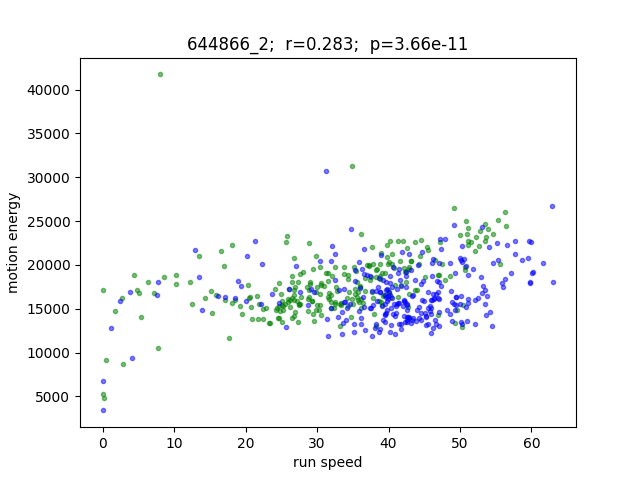

Text(0.5, 1.0, '644866_2;  r=0.283;  p=3.66e-11')

In [270]:
ss=11

fig,ax=plt.subplots(1,1)

ax.plot(sessions[ss].trials.query('trialstimRewarded == "vis1"')['avg_run_speed'],
        sessions[ss].trials.query('trialstimRewarded == "vis1"')['behav_motion'],'g.',alpha=0.5)
ax.plot(sessions[ss].trials.query('trialstimRewarded == "sound1"')['avg_run_speed'],
        sessions[ss].trials.query('trialstimRewarded == "sound1"')['behav_motion'],'b.',alpha=0.5)

r,p=st.pearsonr(sessions[ss].trials['avg_run_speed'],sessions[ss].trials['behav_motion'])
ax.set_xlabel('run speed')
ax.set_ylabel('motion energy')
ax.set_title(sessions[ss].metadata['mouseID']+'_'+str(sessions[ss].metadata['ephys_session_num'])
             +';  r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

<IPython.core.display.Javascript object>


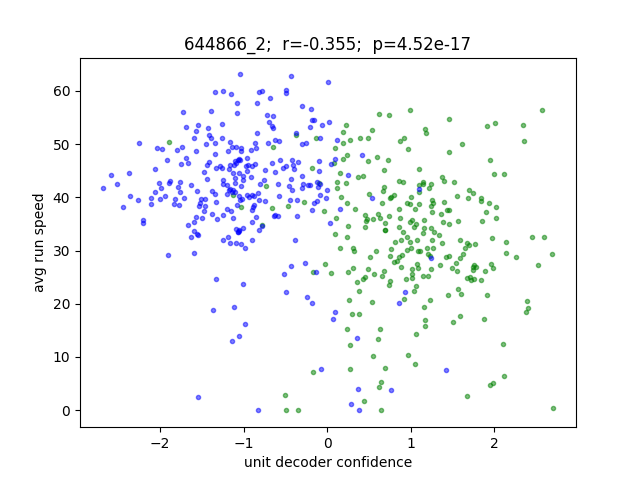

Text(0.5, 1.0, '644866_2;  r=-0.355;  p=4.52e-17')

In [271]:
ss=11

vis_tridx=sessions[ss].trials.query('trialstimRewarded == "vis1"').index
aud_tridx=sessions[ss].trials.query('trialstimRewarded == "sound1"').index

fig,ax=plt.subplots(1,1)

ax.plot(sessions[ss].decoder['dec_func']['all']['block_ids'][vis_tridx],
        sessions[ss].trials.query('trialstimRewarded == "vis1"')['avg_run_speed'],'g.',alpha=0.5)
ax.plot(sessions[ss].decoder['dec_func']['all']['block_ids'][aud_tridx],
        sessions[ss].trials.query('trialstimRewarded == "sound1"')['avg_run_speed'],'b.',alpha=0.5)

r,p=st.pearsonr(sessions[ss].decoder['dec_func']['all']['block_ids'],sessions[ss].trials['avg_run_speed'])
ax.set_xlabel('unit decoder confidence')
ax.set_ylabel('avg run speed')
ax.set_title(sessions[ss].metadata['mouseID']+'_'+str(sessions[ss].metadata['ephys_session_num'])
             +';  r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

<IPython.core.display.Javascript object>


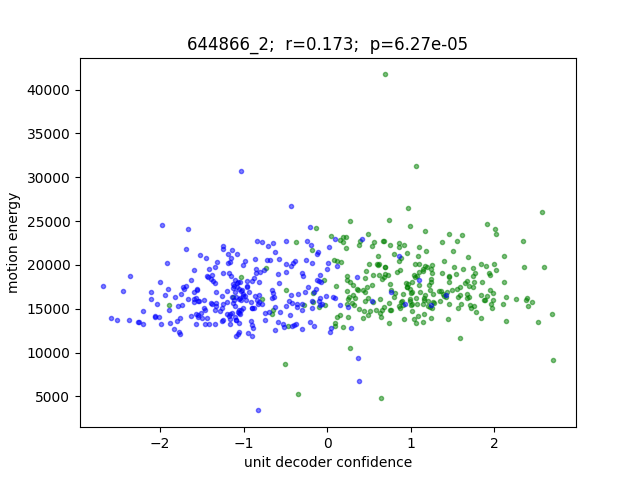

Text(0.5, 1.0, '644866_2;  r=0.173;  p=6.27e-05')

In [273]:
ss=11

vis_tridx=sessions[ss].trials.query('trialstimRewarded == "vis1"').index
aud_tridx=sessions[ss].trials.query('trialstimRewarded == "sound1"').index

fig,ax=plt.subplots(1,1)

ax.plot(sessions[ss].decoder['dec_func']['all']['block_ids'][vis_tridx],
        sessions[ss].trials.query('trialstimRewarded == "vis1"')['behav_motion'],'g.',alpha=0.5)
ax.plot(sessions[ss].decoder['dec_func']['all']['block_ids'][aud_tridx],
        sessions[ss].trials.query('trialstimRewarded == "sound1"')['behav_motion'],'b.',alpha=0.5)

r,p=st.pearsonr(sessions[ss].decoder['dec_func']['all']['block_ids'],sessions[ss].trials['behav_motion'])
ax.set_xlabel('unit decoder confidence')
ax.set_ylabel('motion energy')
ax.set_title(sessions[ss].metadata['mouseID']+'_'+str(sessions[ss].metadata['ephys_session_num'])
             +';  r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

<IPython.core.display.Javascript object>


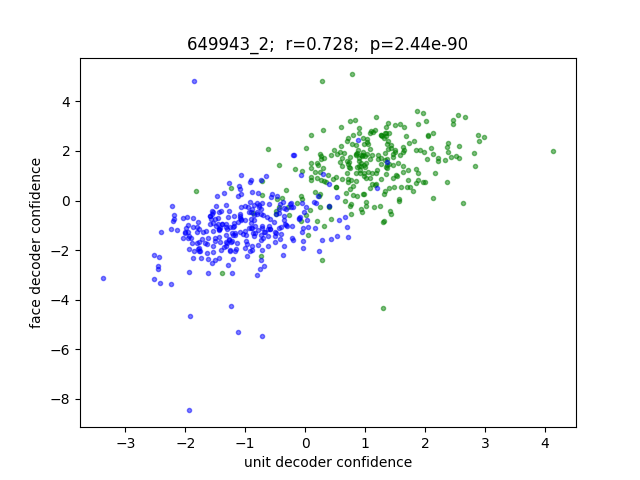

Text(0.5, 1.0, '649943_2;  r=0.728;  p=2.44e-90')

In [765]:
ss=19

vis_tridx=sessions[ss].trials.query('trialstimRewarded == "vis1"').index
aud_tridx=sessions[ss].trials.query('trialstimRewarded == "sound1"').index

fig,ax=plt.subplots(1,1)

ax.plot(sessions[ss].decoder['dec_func']['all']['block_ids'][vis_tridx],
        sessions[ss].decoder_face['dec_func'][0]['block_ids'][vis_tridx],'g.',alpha=0.5)
ax.plot(sessions[ss].decoder['dec_func']['all']['block_ids'][aud_tridx],
        sessions[ss].decoder_face['dec_func'][0]['block_ids'][aud_tridx],'b.',alpha=0.5)

r,p=st.pearsonr(sessions[ss].decoder['dec_func']['all']['block_ids'],
                sessions[ss].decoder_face['dec_func'][0]['block_ids'])
ax.set_xlabel('unit decoder confidence')
ax.set_ylabel('face decoder confidence')
ax.set_title(sessions[ss].metadata['mouseID']+'_'+str(sessions[ss].metadata['ephys_session_num'])
             +';  r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))
# ax.set_ylim([-3,6])

<IPython.core.display.Javascript object>


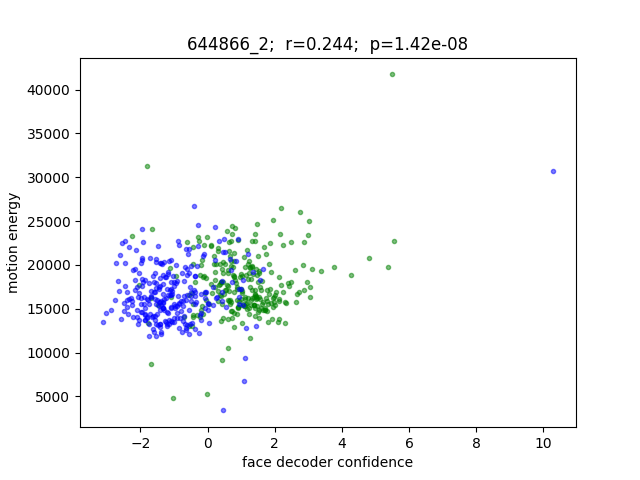

Text(0.5, 1.0, '644866_2;  r=0.244;  p=1.42e-08')

In [275]:
ss=11

vis_tridx=sessions[ss].trials.query('trialstimRewarded == "vis1"').index
aud_tridx=sessions[ss].trials.query('trialstimRewarded == "sound1"').index

fig,ax=plt.subplots(1,1)

ax.plot(sessions[ss].decoder_face['dec_func'][0]['block_ids'][vis_tridx],
        sessions[ss].trials.query('trialstimRewarded == "vis1"')['behav_motion'],'g.',alpha=0.5)
ax.plot(sessions[ss].decoder_face['dec_func'][0]['block_ids'][aud_tridx],
        sessions[ss].trials.query('trialstimRewarded == "sound1"')['behav_motion'],'b.',alpha=0.5)

r,p=st.pearsonr(sessions[ss].decoder_face['dec_func'][0]['block_ids'],sessions[ss].trials['behav_motion'])
ax.set_xlabel('face decoder confidence')
ax.set_ylabel('motion energy')
ax.set_title(sessions[ss].metadata['mouseID']+'_'+str(sessions[ss].metadata['ephys_session_num'])
             +';  r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

<IPython.core.display.Javascript object>


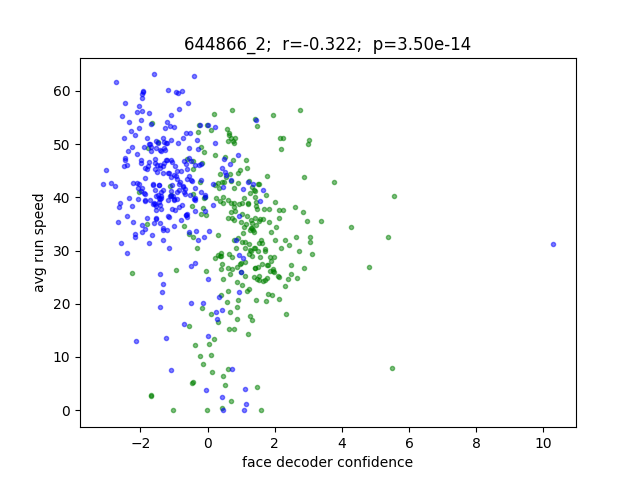

Text(0.5, 1.0, '644866_2;  r=-0.322;  p=3.50e-14')

In [276]:
ss=11

vis_tridx=sessions[ss].trials.query('trialstimRewarded == "vis1"').index
aud_tridx=sessions[ss].trials.query('trialstimRewarded == "sound1"').index

fig,ax=plt.subplots(1,1)

ax.plot(sessions[ss].decoder_face['dec_func'][0]['block_ids'][vis_tridx],
        sessions[ss].trials.query('trialstimRewarded == "vis1"')['avg_run_speed'],'g.',alpha=0.5)
ax.plot(sessions[ss].decoder_face['dec_func'][0]['block_ids'][aud_tridx],
        sessions[ss].trials.query('trialstimRewarded == "sound1"')['avg_run_speed'],'b.',alpha=0.5)

r,p=st.pearsonr(sessions[ss].decoder_face['dec_func'][0]['block_ids'],sessions[ss].trials['avg_run_speed'])
ax.set_xlabel('face decoder confidence')
ax.set_ylabel('avg run speed')
ax.set_title(sessions[ss].metadata['mouseID']+'_'+str(sessions[ss].metadata['ephys_session_num'])
             +';  r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

In [617]:
#summary of correlation between face decoder and other things across sessions

facedec_unit=np.zeros(len(sessions))
facedec_run=np.zeros(len(sessions))
facedec_facemot=np.zeros(len(sessions))

for ss in range(0,len(sessions)):
    if 'block_ids' in sessions[ss].decoder_face['dec_func'][0]:
        if 'trialOptoVoltage' in sessions[ss].trials.columns:
            trials = sessions[ss].trials.query('trialOptoVoltage.isnull()')
        else:
            trials = sessions[ss].trials

        facedec_unit[ss],_=st.pearsonr(
            sessions[ss].decoder['dec_func']['all']['block_ids'],
            sessions[ss].decoder_face['dec_func'][0]['block_ids']
        )
        facedec_run[ss],_=st.pearsonr(
            sessions[ss].decoder_face['dec_func'][0]['block_ids'],
            trials['avg_run_speed']
        )
        facedec_facemot[ss],_=st.pearsonr(
            sessions[ss].decoder_face['dec_func'][0]['block_ids'],
            trials['behav_motion']
        )
    else:
        facedec_unit[ss]=np.nan
        facedec_run[ss]=np.nan
        facedec_facemot[ss]=np.nan
    
h,facedec_unit_p=st.wilcoxon(facedec_unit,nan_policy='omit')
h,facedec_run_p=st.wilcoxon(facedec_run,nan_policy='omit')
h,facedec_facemot_p=st.wilcoxon(facedec_facemot,nan_policy='omit')


In [620]:
facedec_facemot_p

0.550872802734375

In [621]:
def plot_sig_stars(pval, xpos, ypos, ax):
    if pval<0.001:
        ax.text(xpos,ypos,'***',ha='center',va='bottom')
    elif pval<0.01:
        ax.text(xpos,ypos,'**',ha='center',va='bottom')
    elif pval<0.05:
        ax.text(xpos,ypos,'*',ha='center',va='bottom')
    elif pval>=0.05:
        ax.text(xpos,ypos,'n.s.',ha='center',va='bottom')

<IPython.core.display.Javascript object>


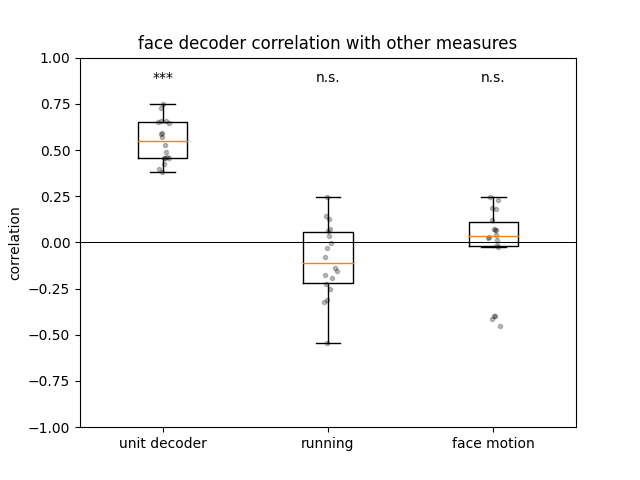

Text(0.5, 1.0, 'face decoder correlation with other measures')

In [623]:
sig_ypos=0.85

fig,ax=plt.subplots(1,1)
ax.axhline(0,color='k',linewidth=0.75)
ax.boxplot([facedec_unit[~np.isnan(facedec_unit)],
            facedec_run[~np.isnan(facedec_run)],
            facedec_facemot[~np.isnan(facedec_facemot)]],showfliers=False)

x = np.random.normal(1, 0.02, size=len(facedec_unit))
ax.plot(x,facedec_unit,'k.',alpha=0.25)
plot_sig_stars(facedec_unit_p,1,sig_ypos,ax)

x = np.random.normal(2, 0.02, size=len(facedec_run))
ax.plot(x,facedec_run,'k.',alpha=0.25)
plot_sig_stars(facedec_run_p,2,sig_ypos,ax)

x = np.random.normal(3, 0.02, size=len(facedec_facemot))
ax.plot(x,facedec_facemot,'k.',alpha=0.25)
plot_sig_stars(facedec_facemot_p,3,sig_ypos,ax)

ax.set_ylabel("correlation")
ax.set_xticks([1,2,3])
ax.set_ylim([-1,1])
ax.set_xticklabels(['unit decoder','running','face motion'])

ax.set_title('face decoder correlation with other measures')


In [612]:
facedec_unit

array([0.59136073, 0.3981593 , 0.45935846, 0.38173666, 0.42588424,
       0.45892468, 0.49000323, 0.65582282, 0.65148209, 0.52496214,
              nan, 0.65877545, 0.74914989, 0.64545577, 0.45785932,
              nan, 0.46259393,        nan,        nan, 0.72823192,
       0.56855839, 0.58723194])

In [592]:
sessions[ss].decoder_face['dec_func'][0]['block_ids'].shape

(218,)

In [ ]:
# summary of corr btwn run speed and motion energy across trials

In [ ]:
# consistent direction of difference between motion and running?

In [ ]:
# run speed / motion energy on CR vs. FA trials?

# also throw in unit decoder confidence?

In [ ]:
# diff in motion energy and/or running correlate with decoder performance?

In [141]:
# face-decoding CR vs. FA

### plot avg decoder confidence for CR vs. FA for non-rewarded target

aa=0
p='block_ids'
block_type=['vis1','sound1']

vis_block_cr_conf=np.zeros(len(sessions))
vis_block_cr_conf[:]=np.nan
vis_block_fa_conf=np.zeros(len(sessions))
vis_block_fa_conf[:]=np.nan
aud_block_cr_conf=np.zeros(len(sessions))
aud_block_cr_conf[:]=np.nan
aud_block_fa_conf=np.zeros(len(sessions))
aud_block_fa_conf[:]=np.nan

#for each session
for sel_session in range(0,len(svc_results)): #sessions:
    
    if aa not in predict_perf[sel_session].keys():
        continue

    for block in block_type:
        if block=='vis1':
            other_target='aud'
            other_stim = 'sound1'
        elif block=='sound1':
            other_target='vis'
            other_stim='vis1'
        
        
        if 'trialOptoVoltage' in sessions[sel_session].trials.columns:
            temp_trials = sessions[sel_session].trials.query('trialOptoVoltage.isnull()')
        else:
            temp_trials = sessions[sel_session].trials
        
        cr_trials = ((temp_trials['trialstimRewarded'] == block)&
                     (temp_trials['vis_autoreward_trials'] == False)&
                     (temp_trials['aud_autoreward_trials'] == False)&
                     (temp_trials['trialStimID'] == other_stim)&
                     (temp_trials['trial_response'] == False))
                                      
        
        fa_trials = ((temp_trials['trialstimRewarded'] == block)&
                     (temp_trials['vis_autoreward_trials'] == False)&
                     (temp_trials['aud_autoreward_trials'] == False)&
                     (temp_trials['trialStimID'] == other_stim)&
                     (temp_trials['trial_response'] == True))
        
        
        #get decoder confidence
        if len(sessions[sel_session].decoder_face['dec_func'][0])>0:
            
            decoder_cr_pred=((sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][cr_trials])
                              /np.nanstd(sessions[sel_session].decoder_face['dec_func'][0]['block_ids']))

            decoder_fa_pred=((sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][fa_trials])
                              /np.nanstd(sessions[sel_session].decoder_face['dec_func'][0]['block_ids']))



            if block=='vis1':
                vis_block_cr_conf[sel_session]=np.nanmean(decoder_cr_pred)
                vis_block_fa_conf[sel_session]=np.nanmean(decoder_fa_pred)
            elif block=='sound1':
                aud_block_cr_conf[sel_session]=np.nanmean(decoder_cr_pred)
                aud_block_fa_conf[sel_session]=np.nanmean(decoder_fa_pred)



# fig,ax=plt.subplots()

# ax.errorbar([0,1],[np.nanmean(vis_block_cr_conf),np.nanmean(vis_block_fa_conf)],
#            [np.nanstd(vis_block_cr_conf)/np.sqrt(np.sum(~np.isnan(vis_block_cr_conf))),
#             np.nanstd(vis_block_fa_conf)/np.sqrt(np.sum(~np.isnan(vis_block_fa_conf)))],marker='o')

# ax.errorbar([0,1],[np.nanmean(aud_block_cr_conf),np.nanmean(aud_block_fa_conf)],
#            [np.nanstd(aud_block_cr_conf)/np.sqrt(np.sum(~np.isnan(aud_block_cr_conf))),
#             np.nanstd(aud_block_fa_conf)/np.sqrt(np.sum(~np.isnan(aud_block_fa_conf)))],marker='^')

# ax.set_ylim([-1.2,1.2])

# ax.set_xticks([0,1])
# ax.set_xticklabels(['CR','FA'])
# ax.set_xlim(-0.25,1.25)
# ax.set_ylabel('aud context <- norm. decoder confidence -> vis context')

# ax.set_title('non-rewarded target stimulus')
# ax.legend(['vis block (aud stim)','aud block (vis stim)'])




In [142]:
# sessions[sel_session].decoder_face['dec_func'][0]

<IPython.core.display.Javascript object>


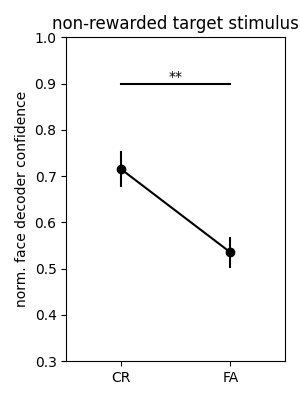

In [607]:
all_block_cr_conf=np.hstack([vis_block_cr_conf[~np.isnan(vis_block_cr_conf)],
                           -aud_block_cr_conf[~np.isnan(aud_block_cr_conf)]])

all_block_fa_conf=np.hstack([vis_block_fa_conf[~np.isnan(vis_block_fa_conf)],
                           -aud_block_fa_conf[~np.isnan(aud_block_fa_conf)]])

h,all_p=st.wilcoxon(all_block_cr_conf,all_block_fa_conf)

fig,ax=plt.subplots(figsize=(3,4))

l1=ax.errorbar(np.asarray([0,1]),[np.nanmean(all_block_cr_conf),np.nanmean(all_block_fa_conf)],
           [np.nanstd(all_block_cr_conf)/np.sqrt(np.sum(~np.isnan(all_block_cr_conf))),
            np.nanstd(all_block_fa_conf)/np.sqrt(np.sum(~np.isnan(all_block_fa_conf)))],marker='o',color='k')

sig_line_pos=0.9

ax.plot([0,1],[sig_line_pos,sig_line_pos],'k')

if all_p<0.001:
    ax.text(0.5,sig_line_pos,'***',ha='center',va='bottom')
elif all_p<0.01:
    ax.text(0.5,sig_line_pos,'**',ha='center',va='bottom')
elif all_p<0.05:
    ax.text(0.5,sig_line_pos,'*',ha='center',va='bottom')
elif all_p>=0.05:
    ax.text(0.5,sig_line_pos,'n.s.',ha='center',va='bottom')
    

ax.set_ylim([0.3,1.0])

ax.set_xticks([0,1])
ax.set_xticklabels(['CR','FA'])
ax.set_xlim(-0.5,1.5)
ax.set_ylabel('norm. face decoder confidence')

ax.set_title('non-rewarded target stimulus')
# ax.legend([l1[0],l2[0]],['vis block (aud stim)','aud block (vis stim)'],loc='lower right')
fig.tight_layout()

In [166]:
sessions[sel_session].trials.keys()

Index(['trialStartFrame', 'trialStimID', 'trialstimRewarded', 'trial_response',
       'trial_rewarded', 'trial_sound_dur', 'trial_vis_stim_dur',
       'vis_go_trials', 'vis_nogo_trials', 'vis_hit_trials',
       'vis_false_alarm_trials', 'vis_miss_trials',
       'vis_correct_reject_trials', 'vis_autoreward_trials', 'aud_go_trials',
       'aud_nogo_trials', 'aud_hit_trials', 'aud_false_alarm_trials',
       'aud_miss_trials', 'aud_correct_reject_trials', 'aud_autoreward_trials',
       'catch_trials', 'catch_resp_trials', 'trialStimStartFrame',
       'stimStartTime', 'stimLatency', 'trial_stim_dur', 'avg_run_speed',
       'vis1_interp', 'sound2_interp', 'sound1_interp', 'vis2_interp',
       'catch_interp', 'cross_modal_dprime', 'intra_modal_dprime',
       'behav_motion', 'behav_SVD_0', 'behav_SVD_1', 'behav_SVD_2',
       'behav_SVD_3', 'behav_SVD_4', 'behav_SVD_5', 'behav_SVD_6',
       'behav_SVD_7', 'behav_SVD_8', 'behav_SVD_9', 'behav_SVD_10',
       'behav_SVD_11', 'behav_S

<IPython.core.display.Javascript object>


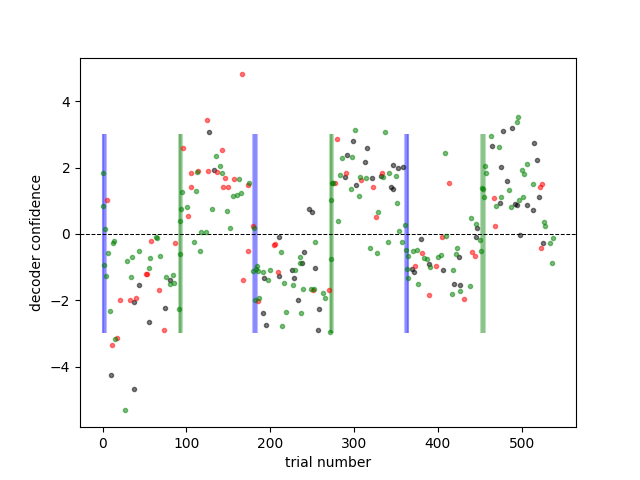

Text(0, 0.5, 'decoder confidence')

In [625]:
sel_session=19
use_face=True

vis_autos=sessions[sel_session].trials.query('vis_autoreward_trials == True').index
aud_autos=sessions[sel_session].trials.query('aud_autoreward_trials == True').index

cr_trials = (
    (sessions[sel_session].trials['trial_response'] == False)
)&((
    (sessions[sel_session].trials['trialstimRewarded'] == 'vis1')&
    (sessions[sel_session].trials['trialStimID'] == 'sound1')
)|(
    (sessions[sel_session].trials['trialstimRewarded'] == 'sound1')&
    (sessions[sel_session].trials['trialStimID'] == 'vis1')
))

fa_trials = (
    (sessions[sel_session].trials['trial_response'] == True)
)&((
    (sessions[sel_session].trials['trialstimRewarded'] == 'vis1')&
    (sessions[sel_session].trials['trialStimID'] == 'sound1')
)|(
    (sessions[sel_session].trials['trialstimRewarded'] == 'sound1')&
    (sessions[sel_session].trials['trialStimID'] == 'vis1')
))

hit_trials = (
    (sessions[sel_session].trials['trial_response'] == True)
)&((
    (sessions[sel_session].trials['trialstimRewarded'] == 'vis1')&
    (sessions[sel_session].trials['trialStimID'] == 'vis1')
)|(
    (sessions[sel_session].trials['trialstimRewarded'] == 'sound1')&
    (sessions[sel_session].trials['trialStimID'] == 'sound1')
))

fig,ax=plt.subplots(1,1)
ax.axhline(0,color='k',linestyle='--',linewidth=0.75)

ax.vlines(vis_autos,ymin=-3,ymax=3,color='g',alpha=0.25)
ax.vlines(aud_autos,ymin=-3,ymax=3,color='b',alpha=0.25)

if use_face:
    ax.plot(np.where(cr_trials)[0],
            sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][cr_trials],'k.',alpha=0.5)

    ax.plot(np.where(fa_trials)[0],
            sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][fa_trials],'r.',alpha=0.5)

    ax.plot(np.where(hit_trials)[0],
            sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][hit_trials],'g.',alpha=0.5)
else:
    ax.plot(np.where(cr_trials)[0],
            sessions[sel_session].decoder['dec_func']['all']['block_ids'][cr_trials],'k.',alpha=0.5)

    ax.plot(np.where(fa_trials)[0],
            sessions[sel_session].decoder['dec_func']['all']['block_ids'][fa_trials],'r.',alpha=0.5)

    ax.plot(np.where(hit_trials)[0],
            sessions[sel_session].decoder['dec_func']['all']['block_ids'][hit_trials],'g.',alpha=0.5)

ax.set_xlabel('trial number')
ax.set_ylabel('decoder confidence')

<IPython.core.display.Javascript object>


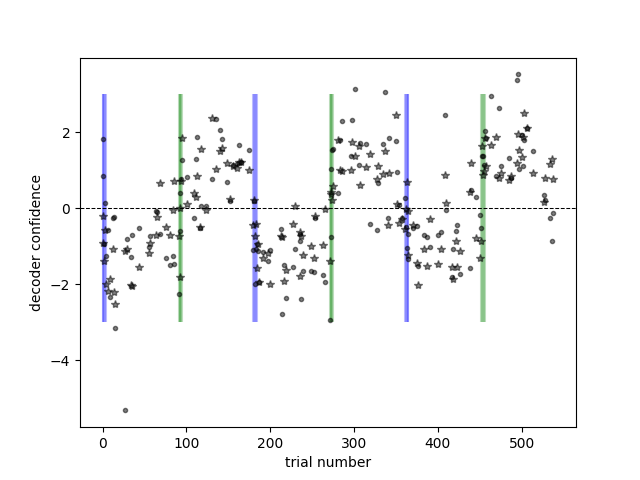

Text(0, 0.5, 'decoder confidence')

In [422]:
sel_session=19
use_face=True

vis_autos=sessions[sel_session].trials.query('vis_autoreward_trials == True').index
aud_autos=sessions[sel_session].trials.query('aud_autoreward_trials == True').index

cr_trials = (
    (sessions[sel_session].trials['trial_response'] == False)
)&((
    (sessions[sel_session].trials['trialstimRewarded'] == 'vis1')&
    (sessions[sel_session].trials['trialStimID'] == 'sound1')
)|(
    (sessions[sel_session].trials['trialstimRewarded'] == 'sound1')&
    (sessions[sel_session].trials['trialStimID'] == 'vis1')
))

fa_trials = (
    (sessions[sel_session].trials['trial_response'] == True)
)&((
    (sessions[sel_session].trials['trialstimRewarded'] == 'vis1')&
    (sessions[sel_session].trials['trialStimID'] == 'sound1')
)|(
    (sessions[sel_session].trials['trialstimRewarded'] == 'sound1')&
    (sessions[sel_session].trials['trialStimID'] == 'vis1')
))

hit_trials = (
    (sessions[sel_session].trials['trial_response'] == True)
)&((
    (sessions[sel_session].trials['trialstimRewarded'] == 'vis1')&
    (sessions[sel_session].trials['trialStimID'] == 'vis1')
)|(
    (sessions[sel_session].trials['trialstimRewarded'] == 'sound1')&
    (sessions[sel_session].trials['trialStimID'] == 'sound1')
))

fig,ax=plt.subplots(1,1)
ax.axhline(0,color='k',linestyle='--',linewidth=0.75)

ax.vlines(vis_autos,ymin=-3,ymax=3,color='g',alpha=0.25)
ax.vlines(aud_autos,ymin=-3,ymax=3,color='b',alpha=0.25)


# ax.plot(np.where(cr_trials)[0],
#         sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][cr_trials],'k.',alpha=0.5)

# ax.plot(np.where(fa_trials)[0],
#         sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][fa_trials],'r.',alpha=0.5)

ax.plot(np.where(hit_trials)[0],
        sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][hit_trials],'k.',alpha=0.5)

# ax.plot(np.where(cr_trials)[0],
#         sessions[sel_session].decoder['dec_func']['all']['block_ids'][cr_trials],'k.',alpha=0.5)

# ax.plot(np.where(fa_trials)[0],
#         sessions[sel_session].decoder['dec_func']['all']['block_ids'][fa_trials],'r.',alpha=0.5)

ax.plot(np.where(hit_trials)[0],
        sessions[sel_session].decoder['dec_func']['all']['block_ids'][hit_trials],'k*',alpha=0.5)

ax.set_xlabel('trial number')
ax.set_ylabel('decoder confidence')

In [201]:
sessions[sel_session].trials.query('vis_autoreward_trials == True')

trialStartFrame trialStimID trialstimRewarded  trial_response  \
0                  0        vis1              vis1            True   
1                674        vis1              vis1            True   
2               1044        vis1              vis1            True   
3               1438        vis1              vis1            True   
4               1841        vis1              vis1            True   
159            72436        vis1              vis1            True   
160            73425        vis1              vis1            True   
161            73759        vis1              vis1            True   
162            74117        vis1              vis1            True   
163            74685        vis1              vis1            True   
317           144718        vis1              vis1            True   
318           146215        vis1              vis1            True   
319           146558        vis1              vis1            True   
320           146931        vis1              vis1            True   
321           147466        vis1              vis1            True   

     trial_rewarded  trial_sound_dur  trial_vis_stim_dur  vis_go_trials  \
0              True              0.0                 0.5           True   
1              True              0.0                 0.5           True   
2              True              0.0                 0.5           True   
3              True              0.0                 0.5           True   
4              True              0.0                 0.5           True   
159            True              0.0                 0.5           True   
160            True              0.0                 0.5           True   
161            True              0.0                 0.5           True   
162            True              0.0                 0.5           True   
163            True              0.0                 0.5           True   
317            True              0.0                 0.5           True   
318            True              0.0                 0.5           True   
319            True              0.0                 0.5           True   
320            True              0.0                 0.5           True   
321            True              0.0                 0.5           True   

     vis_nogo_trials  vis_hit_trials  ...  behav_SVD_40  behav_SVD_41  \
0              False           False  ...     -1.171152     -0.738461   
1              False           False  ...      5.553611      2.941084   
2              False           False  ...      3.072236      0.086831   
3              False           False  ...     -4.376968      0.041293   
4              False           False  ...      1.447036      1.187551   
159            False           False  ...     -2.421087     -4.247348   
160            False           False  ...     -0.692918     -1.060139   
161            False           False  ...      5.390667      4.343139   
162            False           False  ...     -4.035699      3.942091   
163            False           False  ...     -1.453247      0.509607   
317            False           False  ...      1.328217     -0.925122   
318            False           False  ...     -0.078322      0.764171   
319            False           False  ...     -0.626837      3.462290   
320            False           False  ...     -7.068062     -0.477195   
321            False           False  ...     -3.101848      6.540860   

     behav_SVD_42  behav_SVD_43  behav_SVD_44  behav_SVD_45  behav_SVD_46  \
0        0.527509      4.096450     -5.658583     -4.077276      8.070247   
1        2.200411      7.351409      4.523940     -1.028104      9.616808   
2       -7.270326      8.398885     -2.542543     -4.022533     -2.924599   
3       -3.601000      3.615339      3.558024     -1.722496      2.680279   
4        0.705691     -2.276413     -1.205010     -1.189056      3.112452   
159    -15.578469      3.820623     -3.290165      5

<IPython.core.display.Javascript object>


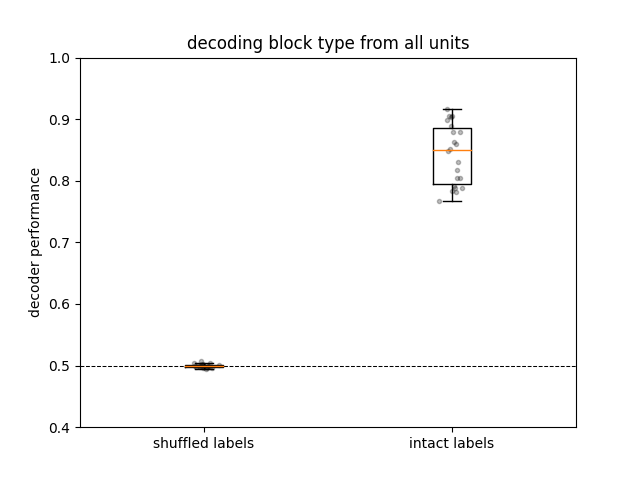

Text(0.5, 1.0, 'decoding block type from all units')

In [390]:
decoder_perf = np.nanmean(np.vstack([decoder_acc_session_mean['all']['block_ids']['vis1'],
                              decoder_acc_session_mean['all']['block_ids']['sound1']]),axis=0)
decoder_shuffle_perf = np.nanmean(np.vstack([decoder_acc_session_shuffle_mean['all']['block_ids']['vis1'],
                                      decoder_acc_session_shuffle_mean['all']['block_ids']['sound1']]),axis=0)

decoder_perf=decoder_perf[~np.isnan(decoder_perf)]
decoder_shuffle_perf=decoder_shuffle_perf[~np.isnan(decoder_shuffle_perf)]

fig,ax=plt.subplots(1,1)
ax.axhline(0.5,color='k',linestyle='--',linewidth=0.75)
ax.boxplot([decoder_shuffle_perf,decoder_perf],showfliers=False)

x = np.random.normal(1, 0.02, size=len(decoder_shuffle_perf))
ax.plot(x,decoder_shuffle_perf,'k.',alpha=0.25)

x = np.random.normal(2, 0.02, size=len(decoder_shuffle_perf))
ax.plot(x,decoder_perf,'k.',alpha=0.25)

ax.set_ylim([0.4,1])
ax.set_ylabel('decoder performance')
ax.set_xticks([1,2])
ax.set_xticklabels(['shuffled labels','intact labels'])
ax.set_title('decoding block type from all units')

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\1123479752.py:1: RuntimeWarning: Mean of empty slice
  decoder_perf = np.nanmean(np.vstack([decoder_acc_session_mean_face[0]['block_ids']['vis1'],
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\1123479752.py:3: RuntimeWarning: Mean of empty slice
  decoder_shuffle_perf = np.nanmean(np.vstack([decoder_acc_session_shuffle_mean_face[0]['block_ids']['vis1'],
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\1123479752.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax=plt.subplots(1,1)


<IPython.core.display.Javascript object>


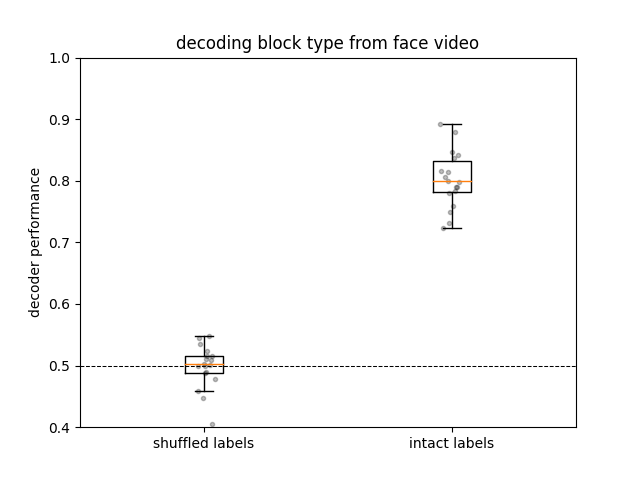

Text(0.5, 1.0, 'decoding block type from face video')

In [632]:
decoder_perf = np.nanmean(np.vstack([decoder_acc_session_mean_face[0]['block_ids']['vis1'],
                              decoder_acc_session_mean_face[0]['block_ids']['sound1']]),axis=0)
decoder_shuffle_perf = np.nanmean(np.vstack([decoder_acc_session_shuffle_mean_face[0]['block_ids']['vis1'],
                                      decoder_acc_session_shuffle_mean_face[0]['block_ids']['sound1']]),axis=0)

decoder_perf=decoder_perf[~np.isnan(decoder_perf)]
decoder_shuffle_perf=decoder_shuffle_perf[~np.isnan(decoder_shuffle_perf)]

fig,ax=plt.subplots(1,1)
ax.axhline(0.5,color='k',linestyle='--',linewidth=0.75)
ax.boxplot([decoder_shuffle_perf,decoder_perf],showfliers=False)

x = np.random.normal(1, 0.02, size=len(decoder_shuffle_perf))
ax.plot(x,decoder_shuffle_perf,'k.',alpha=0.25)

x = np.random.normal(2, 0.02, size=len(decoder_shuffle_perf))
ax.plot(x,decoder_perf,'k.',alpha=0.25)

ax.set_ylim([0.4,1])
ax.set_ylabel('decoder performance')
ax.set_xticks([1,2])
ax.set_xticklabels(['shuffled labels','intact labels'])
ax.set_title('decoding block type from face video')

In [611]:
decoder_perf

array([0.85184256, 0.76770415, 0.78755055, 0.84865652, 0.78254887,
       0.78902808, 0.78423557, 0.83105548, 0.81756317, 0.87853904,
       0.87952779, 0.90504914, 0.9167714 , 0.90555558, 0.88871932,
       0.85990769, 0.79093232, 0.89852707, 0.86302187, 0.90349443,
       0.80485887, 0.80478083])

In [986]:
# set paths & load data

mm = main_paths[19]

behav_path=glob.glob(os.path.join(mm,"Behavior_*.npy"))[0]
cam_frames_path = os.path.join(mm,"camera_frames.pkl")
trials_path = os.path.join(mm,"trials_table.csv")
metadata_path = os.path.join(mm,"metadata.pkl")

trials=pd.read_csv(trials_path)
behav_info=np.load(behav_path,allow_pickle=True)
with open(cam_frames_path, 'rb') as filepath:
    cam_frames=pickle.load(filepath)

with open(metadata_path, 'rb') as handle:
    metadata = pickle.load(handle)

In [865]:
behav_info.item().keys()

dict_keys(['filenames', 'save_path', 'Ly', 'Lx', 'sbin', 'fullSVD', 'save_mat', 'Lybin', 'Lxbin', 'sybin', 'sxbin', 'LYbin', 'LXbin', 'avgframe', 'avgmotion', 'avgframe_reshape', 'avgmotion_reshape', 'motion', 'motSv', 'movSv', 'motMask', 'movMask', 'motMask_reshape', 'movMask_reshape', 'motSVD', 'movSVD', 'pupil', 'running', 'blink', 'rois', 'sy', 'sx'])

In [866]:
behav_info.item()['motion'][1]

array([ 7917.,  6801.,  6913., ..., 33702., 19695., 24155.], dtype=float32)

In [867]:
behav_info.item()['motMask_reshape'][1].shape

(61, 99, 500)

In [868]:
behav_info.item()['motSVD'][1].shape

(279752, 500)

<IPython.core.display.Javascript object>


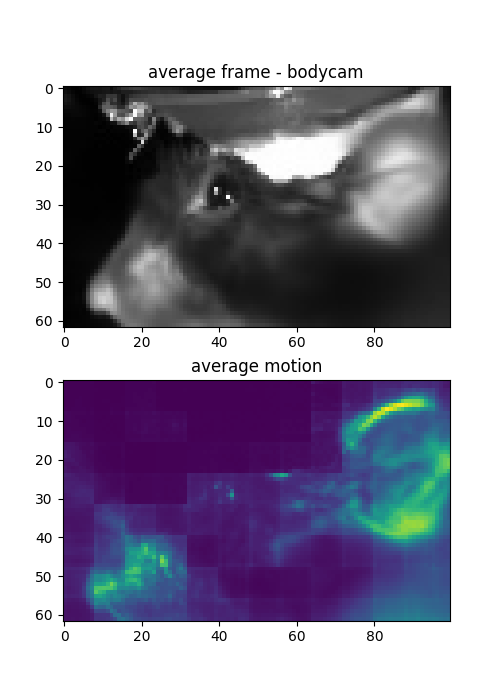

Text(0.5, 1.0, 'average motion')

In [987]:
fig,ax=plt.subplots(2,1,figsize=(5,7))

ax[0].imshow(behav_info.item()['avgframe_reshape'],cmap='gray')
ax[0].set_title('average frame - bodycam')

ax[1].imshow(behav_info.item()['avgmotion_reshape'])
ax[1].set_title('average motion')

In [988]:
# get trial-wise SVD features

# 2 sec before + after stimulus onset
time_before=2
time_after=2
fps=60

behav_SVD_by_trial = np.zeros(((time_before+time_after)*fps,500,len(trials)))
behav_motion_by_trial = np.zeros(((time_before+time_after)*fps,len(trials)))

for tt,stimStartTime in enumerate(trials['stimStartTime']):
    stim_start_frame=np.where(cam_frames['behavior']>=stimStartTime)[0][0]
    trial_start_frame=stim_start_frame-time_before*fps
    trial_end_frame=stim_start_frame+time_before*fps
    
    behav_SVD_by_trial[:,:,tt]=behav_info.item()['motSVD'][1][trial_start_frame:trial_end_frame,:]    
    behav_motion_by_trial[:,tt] = behav_info.item()['motion'][1][trial_start_frame:trial_end_frame]
    
mean_trial_behav_SVD = np.nanmean(behav_SVD_by_trial,axis=2)
t_points=np.arange(-time_before,time_after,1/fps)


#average within vis vs. aud blocks
#SVD
vis_block_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialstimRewarded']=='vis1'],axis=2)
aud_block_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialstimRewarded']=='sound1'],axis=2)

vis_block_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialstimRewarded']=='vis1'],
                                  nan_policy='omit',axis=2)
aud_block_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialstimRewarded']=='sound1'],
                                  nan_policy='omit',axis=2)

#absolute motion
vis_block_behav_motion=np.nanmean(behav_motion_by_trial[:,trials['trialstimRewarded']=='vis1'],axis=1)
aud_block_behav_motion=np.nanmean(behav_motion_by_trial[:,trials['trialstimRewarded']=='sound1'],axis=1)

vis_block_behav_motion_sem=st.sem(behav_motion_by_trial[:,trials['trialstimRewarded']=='vis1'],
                                  nan_policy='omit',axis=1)
aud_block_behav_motion_sem=st.sem(behav_motion_by_trial[:,trials['trialstimRewarded']=='sound1'],
                                  nan_policy='omit',axis=1)




In [572]:
# behav_info.item()['motion']

<IPython.core.display.Javascript object>


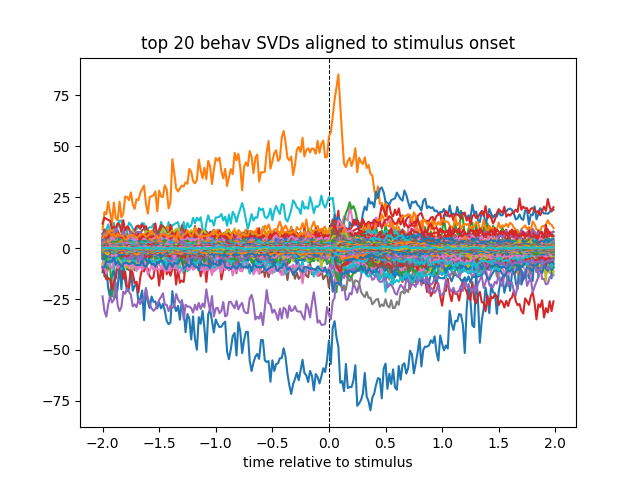

Text(0.5, 1.0, 'top 20 behav SVDs aligned to stimulus onset')

In [989]:
fig,ax=plt.subplots(1,1)
ax.axvline(0,color='k',linewidth=0.75,linestyle='--')
ax.plot(t_points,mean_trial_behav_SVD)
ax.set_xlabel('time relative to stimulus')
ax.set_title('top 20 behav SVDs aligned to stimulus onset')

<IPython.core.display.Javascript object>


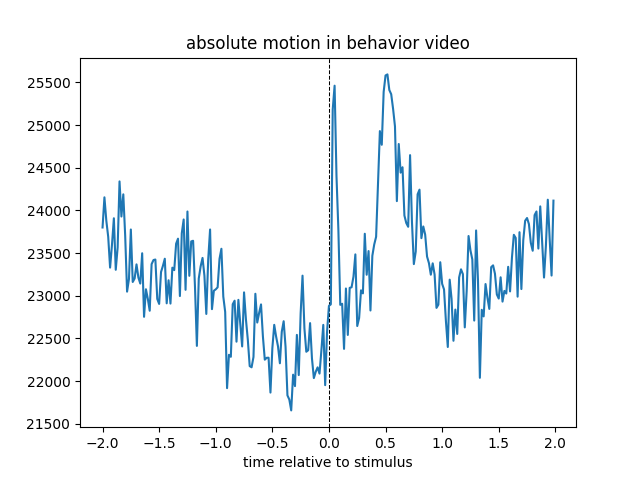

Text(0.5, 1.0, 'absolute motion in behavior video')

In [872]:
fig,ax=plt.subplots(1,1)
ax.axvline(0,color='k',linewidth=0.75,linestyle='--')
ax.plot(t_points,np.mean(behav_motion_by_trial,1))
ax.set_xlabel('time relative to stimulus')
ax.set_title('absolute motion in behavior video')

<IPython.core.display.Javascript object>


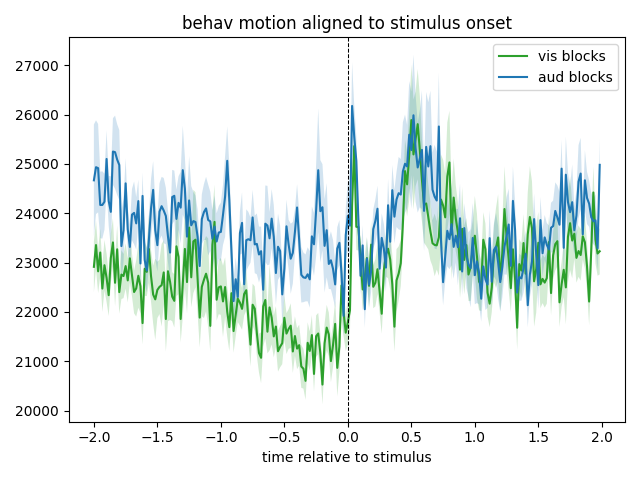

In [873]:
fig,ax=plt.subplots(1,1)

y=vis_block_behav_motion
err=vis_block_behav_motion_sem
ax.plot(t_points, y, 'tab:green')
plt.fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=aud_block_behav_motion
err=aud_block_behav_motion_sem
ax.plot(t_points, y, 'tab:blue')
plt.fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

# ax.plot(t_points,aud_block_behav_motion,'tab:blue')


ax.legend(['vis blocks','aud blocks'])
ax.axvline(0,color='k',linewidth=0.75,linestyle='--')
ax.set_xlabel('time relative to stimulus')
ax.set_title('behav motion aligned to stimulus onset')

fig.tight_layout()

In [874]:
#average across stimuli regardless of block
#SVD
vis1_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialStimID']=='vis1'],axis=2)
vis2_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialStimID']=='vis2'],axis=2)
sound1_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialStimID']=='sound1'],axis=2)
sound2_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialStimID']=='sound2'],axis=2)

vis1_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialStimID']=='vis1'],axis=2)
vis2_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialStimID']=='vis2'],axis=2)
sound1_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialStimID']=='sound1'],axis=2)
sound2_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialStimID']=='sound2'],axis=2)

#absolute motion
vis1_behav_motion=np.nanmean(behav_motion_by_trial[:,trials['trialStimID']=='vis1'],axis=1)
vis2_behav_motion=np.nanmean(behav_motion_by_trial[:,trials['trialStimID']=='vis2'],axis=1)
sound1_behav_motion=np.nanmean(behav_motion_by_trial[:,trials['trialStimID']=='sound1'],axis=1)
sound2_behav_motion=np.nanmean(behav_motion_by_trial[:,trials['trialStimID']=='sound2'],axis=1)

vis1_behav_motion_sem=st.sem(behav_motion_by_trial[:,trials['trialStimID']=='vis1'],axis=1)
vis2_behav_motion_sem=st.sem(behav_motion_by_trial[:,trials['trialStimID']=='vis2'],axis=1)
sound1_behav_motion_sem=st.sem(behav_motion_by_trial[:,trials['trialStimID']=='sound1'],axis=1)
sound2_behav_motion_sem=st.sem(behav_motion_by_trial[:,trials['trialStimID']=='sound2'],axis=1)


<IPython.core.display.Javascript object>


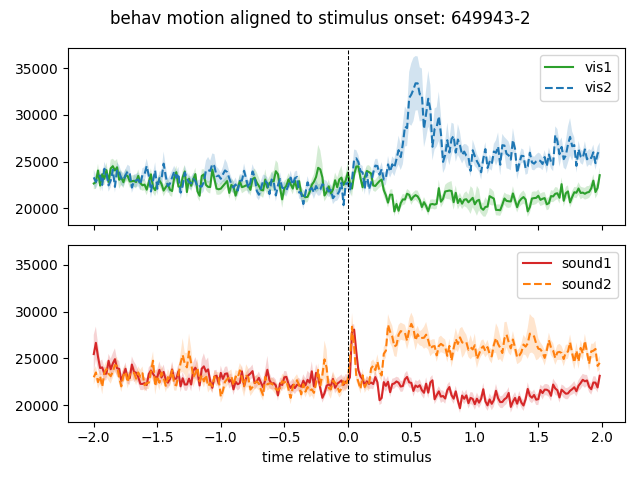

In [878]:
fig,ax=plt.subplots(2,1,sharey=True,sharex=True)

y=vis1_behav_motion
err=vis1_behav_motion_sem
ax[0].plot(t_points, y, 'tab:green')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=vis2_behav_motion
err=vis2_behav_motion_sem
ax[0].plot(t_points, y, 'tab:blue',linestyle='--')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

y=sound1_behav_motion
err=sound1_behav_motion_sem
ax[1].plot(t_points, y, 'tab:red')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:red')

y=sound2_behav_motion
err=sound2_behav_motion_sem
ax[1].plot(t_points, y, 'tab:orange',linestyle='--')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:orange')

# ax.plot(t_points,aud_block_behav_motion,'tab:blue')


ax[0].legend(['vis1','vis2'])
ax[1].legend(['sound1','sound2'])
ax[0].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].set_xlabel('time relative to stimulus')
fig.suptitle('behav motion aligned to stimulus onset: '+metadata['mouseID']+'-'+str(metadata['ephys_session_num']))

fig.tight_layout()

In [876]:
#average across stimuli, vis block
vis_block_trials = trials['trialstimRewarded']=='vis1'
aud_block_trials = trials['trialstimRewarded']=='sound1'

#SVD

#absolute motion - vis block
vis1_vis_motion=np.nanmean(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='vis1')],axis=1)
vis2_vis_motion=np.nanmean(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='vis2')],axis=1)
sound1_vis_motion=np.nanmean(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='sound1')],axis=1)
sound2_vis_motion=np.nanmean(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='sound2')],axis=1)

vis1_vis_motion_sem=st.sem(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='vis1')],axis=1)
vis2_vis_motion_sem=st.sem(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='vis2')],axis=1)
sound1_vis_motion_sem=st.sem(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='sound1')],axis=1)
sound2_vis_motion_sem=st.sem(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='sound2')],axis=1)

#aud block
vis1_aud_motion=np.nanmean(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='vis1')],axis=1)
vis2_aud_motion=np.nanmean(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='vis2')],axis=1)
sound1_aud_motion=np.nanmean(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='sound1')],axis=1)
sound2_aud_motion=np.nanmean(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='sound2')],axis=1)

vis1_aud_motion_sem=st.sem(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='vis1')],axis=1)
vis2_aud_motion_sem=st.sem(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='vis2')],axis=1)
sound1_aud_motion_sem=st.sem(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='sound1')],axis=1)
sound2_aud_motion_sem=st.sem(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='sound2')],axis=1)

<IPython.core.display.Javascript object>


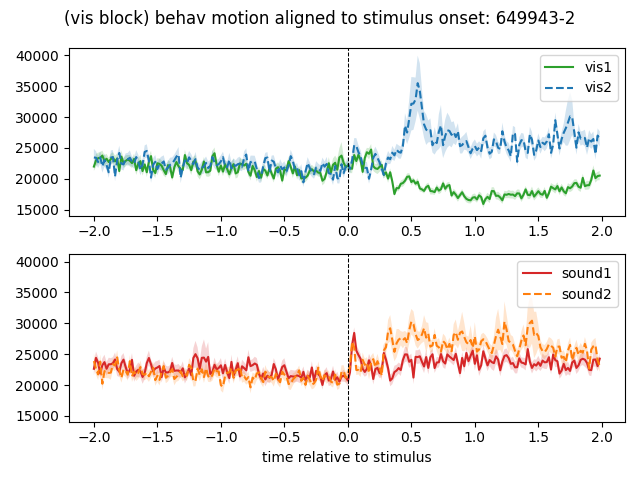

In [877]:
fig,ax=plt.subplots(2,1,sharey=True)

y=vis1_vis_motion
err=vis1_vis_motion_sem
ax[0].plot(t_points, y, 'tab:green')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=vis2_vis_motion
err=vis2_vis_motion_sem
ax[0].plot(t_points, y, 'tab:blue',linestyle='--')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

y=sound1_vis_motion
err=sound1_vis_motion_sem
ax[1].plot(t_points, y, 'tab:red')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:red')

y=sound2_vis_motion
err=sound2_vis_motion_sem
ax[1].plot(t_points, y, 'tab:orange',linestyle='--')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:orange')

# ax.plot(t_points,aud_block_behav_motion,'tab:blue')


ax[0].legend(['vis1','vis2'])
ax[1].legend(['sound1','sound2'])
ax[0].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].set_xlabel('time relative to stimulus')
fig.suptitle('(vis block) behav motion aligned to stimulus onset: '+metadata['mouseID']+'-'+str(metadata['ephys_session_num']))

fig.tight_layout()

<IPython.core.display.Javascript object>


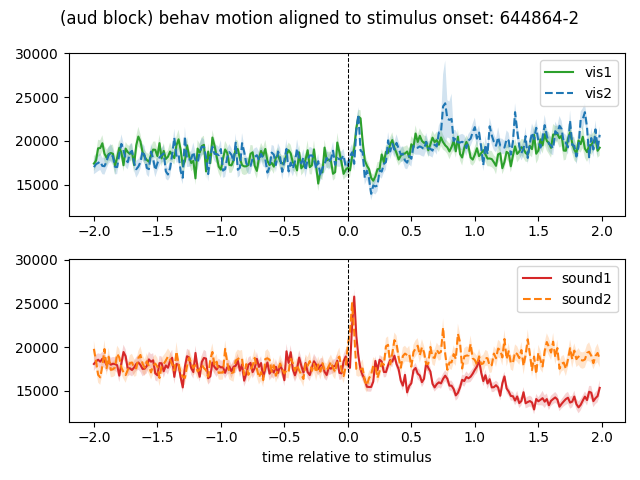

In [580]:
fig,ax=plt.subplots(2,1,sharey=True)

y=vis1_aud_motion
err=vis1_aud_motion_sem
ax[0].plot(t_points, y, 'tab:green')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=vis2_aud_motion
err=vis2_aud_motion_sem
ax[0].plot(t_points, y, 'tab:blue',linestyle='--')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

y=sound1_aud_motion
err=sound1_aud_motion_sem
ax[1].plot(t_points, y, 'tab:red')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:red')

y=sound2_aud_motion
err=sound2_aud_motion_sem
ax[1].plot(t_points, y, 'tab:orange',linestyle='--')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:orange')

# ax.plot(t_points,aud_block_behav_motion,'tab:blue')


ax[0].legend(['vis1','vis2'])
ax[1].legend(['sound1','sound2'])
ax[0].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].set_xlabel('time relative to stimulus')
fig.suptitle('(aud block) behav motion aligned to stimulus onset: '+metadata['mouseID']+'-'+str(metadata['ephys_session_num']))

fig.tight_layout()

In [581]:
# break into response vs. non response

#average across stimuli, vis block
response_trials = trials['trial_response']==True
non_response_trials = trials['trial_response']==False

#SVD

#absolute motion - vis block
vis1_resp_motion=np.nanmean(behav_motion_by_trial[:,response_trials&(trials['trialStimID']=='vis1')],axis=1)
vis2_resp_motion=np.nanmean(behav_motion_by_trial[:,response_trials&(trials['trialStimID']=='vis2')],axis=1)
sound1_resp_motion=np.nanmean(behav_motion_by_trial[:,response_trials&(trials['trialStimID']=='sound1')],axis=1)
sound2_resp_motion=np.nanmean(behav_motion_by_trial[:,response_trials&(trials['trialStimID']=='sound2')],axis=1)

vis1_resp_motion_sem=st.sem(behav_motion_by_trial[:,response_trials&(trials['trialStimID']=='vis1')],axis=1)
vis2_resp_motion_sem=st.sem(behav_motion_by_trial[:,response_trials&(trials['trialStimID']=='vis2')],axis=1)
sound1_resp_motion_sem=st.sem(behav_motion_by_trial[:,response_trials&(trials['trialStimID']=='sound1')],axis=1)
sound2_resp_motion_sem=st.sem(behav_motion_by_trial[:,response_trials&(trials['trialStimID']=='sound2')],axis=1)

#aud block
vis1_nonresp_motion=np.nanmean(behav_motion_by_trial[:,non_response_trials&(trials['trialStimID']=='vis1')],axis=1)
vis2_nonresp_motion=np.nanmean(behav_motion_by_trial[:,non_response_trials&(trials['trialStimID']=='vis2')],axis=1)
sound1_nonresp_motion=np.nanmean(behav_motion_by_trial[:,non_response_trials&(trials['trialStimID']=='sound1')],axis=1)
sound2_nonresp_motion=np.nanmean(behav_motion_by_trial[:,non_response_trials&(trials['trialStimID']=='sound2')],axis=1)

vis1_nonresp_motion_sem=st.sem(behav_motion_by_trial[:,non_response_trials&(trials['trialStimID']=='vis1')],axis=1)
vis2_nonresp_motion_sem=st.sem(behav_motion_by_trial[:,non_response_trials&(trials['trialStimID']=='vis2')],axis=1)
sound1_nonresp_motion_sem=st.sem(behav_motion_by_trial[:,non_response_trials&(trials['trialStimID']=='sound1')],axis=1)
sound2_nonresp_motion_sem=st.sem(behav_motion_by_trial[:,non_response_trials&(trials['trialStimID']=='sound2')],axis=1)




<IPython.core.display.Javascript object>


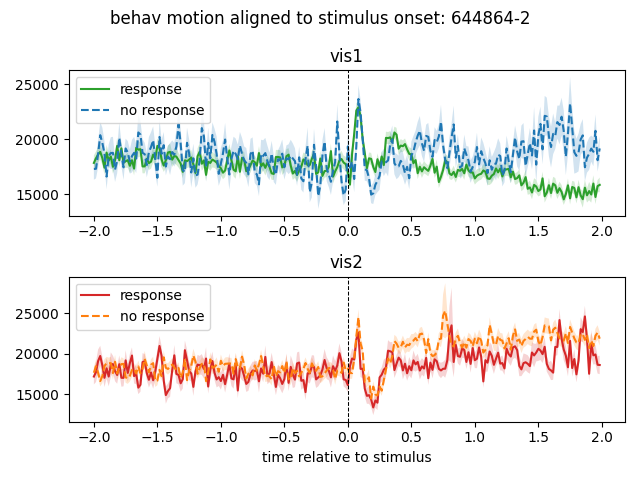

In [582]:
fig,ax=plt.subplots(2,1)

y=vis1_resp_motion
err=vis1_resp_motion_sem
ax[0].plot(t_points, y, 'tab:green')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=vis1_nonresp_motion
err=vis1_nonresp_motion_sem
ax[0].plot(t_points, y, 'tab:blue',linestyle='--')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

y=vis2_resp_motion
err=vis2_resp_motion_sem
ax[1].plot(t_points, y, 'tab:red')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:red')

y=vis2_nonresp_motion
err=vis2_nonresp_motion_sem
ax[1].plot(t_points, y, 'tab:orange',linestyle='--')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:orange')

# ax.plot(t_points,aud_block_behav_motion,'tab:blue')


ax[0].legend(['response','no response'])
ax[0].set_title('vis1')
ax[1].legend(['response','no response'])
ax[1].set_title('vis2')
ax[0].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].set_xlabel('time relative to stimulus')
fig.suptitle('behav motion aligned to stimulus onset: '+metadata['mouseID']+'-'+str(metadata['ephys_session_num']))

fig.tight_layout()

<IPython.core.display.Javascript object>


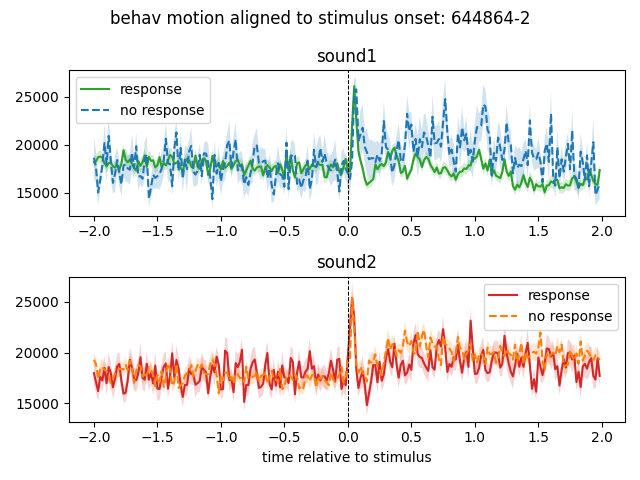

In [583]:
fig,ax=plt.subplots(2,1)

y=sound1_resp_motion
err=sound1_resp_motion_sem
ax[0].plot(t_points, y, 'tab:green')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=sound1_nonresp_motion
err=sound1_nonresp_motion_sem
ax[0].plot(t_points, y, 'tab:blue',linestyle='--')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

y=sound2_resp_motion
err=sound2_resp_motion_sem
ax[1].plot(t_points, y, 'tab:red')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:red')

y=sound2_nonresp_motion
err=sound2_nonresp_motion_sem
ax[1].plot(t_points, y, 'tab:orange',linestyle='--')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:orange')

# ax.plot(t_points,aud_block_behav_motion,'tab:blue')


ax[0].legend(['response','no response'])
ax[0].set_title('sound1')
ax[1].legend(['response','no response'])
ax[1].set_title('sound2')
ax[0].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].set_xlabel('time relative to stimulus')
fig.suptitle('behav motion aligned to stimulus onset: '+metadata['mouseID']+'-'+str(metadata['ephys_session_num']))

fig.tight_layout()

In [584]:
fig_save_path = r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2023-09-07-plots-for-lab-meeting"

In [585]:
# sel_feature=0

# for sel_feature in range(0,20):

#     fig,ax=plt.subplots(1,2,figsize=(10,3.5))

#     y=vis_block_behav_SVD[:,sel_feature]
#     err=vis_block_behav_SVD_sem[:,sel_feature]
#     ax[0].plot(t_points, y, 'tab:green')
#     ax[0].fill_between(t_points, y-err, y+err,
#         alpha=0.2, edgecolor=None, facecolor='tab:green')

#     y=aud_block_behav_SVD[:,sel_feature]
#     err=aud_block_behav_SVD_sem[:,sel_feature]
#     ax[0].plot(t_points, y, 'tab:blue')
#     ax[0].fill_between(t_points, y-err, y+err,
#         alpha=0.2, edgecolor=None, facecolor='tab:blue')

#     # ax[0].plot(t_points,vis_block_behav_SVD[:,sel_feature],'tab:green')
#     # ax[0].plot(t_points,aud_block_behav_SVD[:,sel_feature],'tab:blue')
#     ax[0].legend(['vis blocks','aud blocks'])
#     ax[0].axvline(0,color='k',linewidth=0.75,linestyle='--')
#     ax[0].set_xlabel('time relative to stimulus')
#     ax[0].set_title('behav SVD '+str(sel_feature)+' aligned to stimulus onset')


#     ax[1].imshow(behav_info.item()['motMask_reshape'][0][:,:,sel_feature],cmap='bwr',vmin=-.1,vmax=.1)
#     ax[1].set_title('motMask_reshape for behav SVD '+str(sel_feature))
#     fig.tight_layout()

#     figname=metadata['mouseID']+'-'+str(metadata['ephys_session_num'])+'_behav_SVD_'+str(sel_feature)+'.png'
#     plt.savefig(os.path.join(fig_save_path,figname), dpi=300, facecolor='w', edgecolor='w',
#                 orientation='portrait', format='png', transparent=True, bbox_inches='tight', 
#                 pad_inches=0.1, metadata=None)


In [586]:
# compare motion / SVDs with running

# also compare with decoding from neural activity

In [587]:
# try to decode context with running or motion/SVDs

In [679]:
# combine everything together!!
#run diffs, face motion diffs, overall face & unit decoder performance, mouse behavioral performance


# distribution of running across different contexts 

bins=np.arange(0,60,2)

behav_diffs={
    'mouse':[],
    'session':[],
    'vis_run_median':[],
    'aud_run_median':[],
    'run_ctxt_diff':[],
    'p_run_context':[],
    'vis_facemot_median':[],
    'aud_facemot_median':[],
    'facemot_ctxt_diff':[],
    'p_facemot_context':[],
    'unit_decoder_perf':[],
    'face_decoder_perf':[],
    'mouse_cross_dprime':[],
    'mouse_intra_dprime':[],
}

decoder_unit_perf = np.nanmean(np.vstack([decoder_acc_session_mean['all']['block_ids']['vis1'],
                                          decoder_acc_session_mean['all']['block_ids']['sound1']]),axis=0)
decoder_face_perf = np.nanmean(np.vstack([decoder_acc_session_mean_face[0]['block_ids']['vis1'],
                                          decoder_acc_session_mean_face[0]['block_ids']['sound1']]),axis=0)

for sel_session in range(0,len(sessions)):#sessions:
    
    #context diffs
    vis_context_trials=sessions[sel_session].trials.query('trialstimRewarded == "vis1" and \
                                                           vis_autoreward_trials == False and \
                                                           aud_autoreward_trials == False')
    aud_context_trials=sessions[sel_session].trials.query('trialstimRewarded == "sound1" and \
                                                           vis_autoreward_trials == False and \
                                                           aud_autoreward_trials == False')
    
    vis_context_running=vis_context_trials['avg_run_speed'].values
    aud_context_running=aud_context_trials['avg_run_speed'].values
    h_ctxt_running,p_ctxt_running=st.ranksums(vis_context_running, aud_context_running)
    
    vis_context_facemot=vis_context_trials['behav_motion'].values
    aud_context_facemot=aud_context_trials['behav_motion'].values
    h_ctxt_facemot,p_ctxt_facemot=st.ranksums(vis_context_facemot, aud_context_facemot)
    
    
    #mouse performance
    hit_pct=np.mean(np.hstack([sessions[sel_session].trials.query(
        'trialstimRewarded=="vis1" and trialStimID=="vis1" and vis_autoreward_trials==False'
    )['trial_response'],
    sessions[0].trials.query(
        'trialstimRewarded=="sound1" and trialStimID=="sound1" and aud_autoreward_trials==False'
    )['trial_response']]))

    cross_fa_pct=np.mean(np.hstack([sessions[sel_session].trials.query(
        'trialstimRewarded=="vis1" and trialStimID=="sound1" and aud_autoreward_trials==False'
    )['trial_response'],
    sessions[0].trials.query(
        'trialstimRewarded=="sound1" and trialStimID=="vis1" and vis_autoreward_trials==False'
    )['trial_response']]))

    inter_fa_pct=np.mean(np.hstack([sessions[sel_session].trials.query(
        'trialstimRewarded=="vis1" and trialStimID=="vis2" and vis_autoreward_trials==False'
    )['trial_response'],
    sessions[0].trials.query(
        'trialstimRewarded=="sound1" and trialStimID=="sound2" and aud_autoreward_trials==False'
    )['trial_response']]))
    if hit_pct==1:
        hit_pct=0.999
    elif hit_pct==0:
        hit_pct=0.001      
    if cross_fa_pct==1:
        cross_fa_pct=0.999
    elif cross_fa_pct==0:
        cross_fa_pct=0.001
    if inter_fa_pct==1:
        inter_fa_pct=0.999
    elif inter_fa_pct==0:
        inter_fa_pct=0.001

    cross_modal_dprime=(st.norm.ppf(hit_pct) - st.norm.ppf(cross_fa_pct))
    intra_modal_dprime=(st.norm.ppf(hit_pct) - st.norm.ppf(inter_fa_pct))

    
    behav_diffs['mouse'].append(sessions[sel_session].metadata['mouseID'])
    behav_diffs['session'].append(sessions[sel_session].metadata['ephys_session_num'])
    behav_diffs['vis_run_median'].append(np.median(vis_context_running))
    behav_diffs['aud_run_median'].append(np.median(aud_context_running))
    behav_diffs['run_ctxt_diff'].append(np.median(vis_context_running)-
                                      np.median(aud_context_running))
    behav_diffs['p_run_context'].append(p_ctxt_running)
    
    behav_diffs['vis_facemot_median'].append(np.median(vis_context_facemot))
    behav_diffs['aud_facemot_median'].append(np.median(aud_context_facemot))
    behav_diffs['facemot_ctxt_diff'].append(np.median(vis_context_facemot)-
                                          np.median(aud_context_facemot))
    behav_diffs['p_facemot_context'].append(p_ctxt_facemot)
    
    behav_diffs['unit_decoder_perf'].append(decoder_unit_perf[sel_session])
    behav_diffs['face_decoder_perf'].append(decoder_face_perf[sel_session])
    
    behav_diffs['mouse_cross_dprime'].append(cross_modal_dprime)
    behav_diffs['mouse_intra_dprime'].append(intra_modal_dprime)

    
    
behav_diffs=pd.DataFrame.from_dict(behav_diffs)

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\3548776147.py:28: RuntimeWarning: Mean of empty slice
  decoder_face_perf = np.nanmean(np.vstack([decoder_acc_session_mean_face[0]['block_ids']['vis1'],


In [680]:
behav_diffs

mouse  session  vis_run_median  aud_run_median  run_ctxt_diff  \
0   626791        1        1.453263       14.494857     -13.041594   
1   626791        2       18.221540       17.315050       0.906491   
2   626791        3       22.342116       24.626328      -2.284212   
3   636766        1       39.200323       33.324321       5.876002   
4   636766        2       44.259764       36.137320       8.122444   
5   636766        3       38.340596       37.446695       0.893900   
6   636766        4       38.347790       36.428692       1.919098   
7   644864        1       25.466271       27.363786      -1.897515   
8   644864        2       24.248624       25.232454      -0.983830   
9   644864        3       21.471597       24.311574      -2.839978   
10  644864        4       22.559745       25.892537      -3.332792   
11  644866        2       32.009550       42.396422     -10.386872   
12  644866        3       33.414251       42.750745      -9.336494   
13  644866        4       34.982624       46.558365     -11.575741   
14  644867        1       19.482354       16.590217       2.892137   
15  644867        2       21.000366       20.029126       0.971240   
16  644867        3       25.838579       26.444705      -0.606126   
17  644867        4       31.653429       29.263100       2.390329   
18  649943        1       33.354897       34.336929      -0.982031   
19  649943        2       26.306214       35.004207      -8.697993   
20  649943        3       28.583232       34.822549      -6.239317   
21  649943        4       34.804563       38.189514      -3.384951   

    p_run_context  vis_facemot_median  aud_facemot_median  facemot_ctxt_diff  \
0    2.929064e-16         7625.116667        15899.658333       -8274.541667   
1    1.601413e-02        16562.683333        15394.716667        1167.966667   
2    2.808534e-04        18664.550000        18788.433333        -123.883333   
3    2.588139e-05        15749.566667        15242.116667         507.450000   
4    9.120153e-03        16713.166667        15589.975000        1123.191667   
5    6.720898e-01        14393.483333        13560.550000         832.933333   
6    7.824652e-01        15119.658333        13490.616667        1629.041667   
7    1.191194e-03        17161.883333        16880.150000         281.733333   
8    8.390645e-02        17355.700000        17586.358333        -230.658333   
9    2.595381e-12        19023.850000        18780.508333         243.341667   
10   9.081491e-09                 NaN                 NaN                NaN   
11   5.563882e-19        17264.625000        16310.316667         954.308333   
12   1.516603e-11        17157.716667        16978.500000         179.216667   
13   1.614368e-16        19185.966667        18644.533333         541.433333   
14   5.741401e-09        14771.266667        14934.583333        -163.316667   
15   8.780902e-02                 NaN                 NaN                NaN   
16   3.563778e-01        17812.883333        17749.233333          63.650000   
17   5.034211e-03                 NaN                 NaN                NaN   
18   3.747249e-03        20303.225000                 NaN                NaN   
19   3.669663e-13        20801.200000        22921.275000       -2120.075000   
20   1.904668e-09        22406.750000        23597.166667       -1190.416667   
21   6.859039e-05        20850.391667        22062.908333       -1212.516667   

    p_facemot_context  unit_decoder_perf  face_decoder_perf  \
0        1.453660e-15           0.851843           0.789145   
1        2.002849e-05           0.767704           0.759766   
2        7.199993e-01           0.787551           0.816393   
3        1.629481e-01           0.848657           0.780409   
4        1.606194e-02           0.782549           0.722856   
5        1.157068e-03           0.789028           0.749839   
6        1.246309e-10           0.784236           0.732009   
7        8.129635e-03           0.831055         

<IPython.core.display.Javascript object>


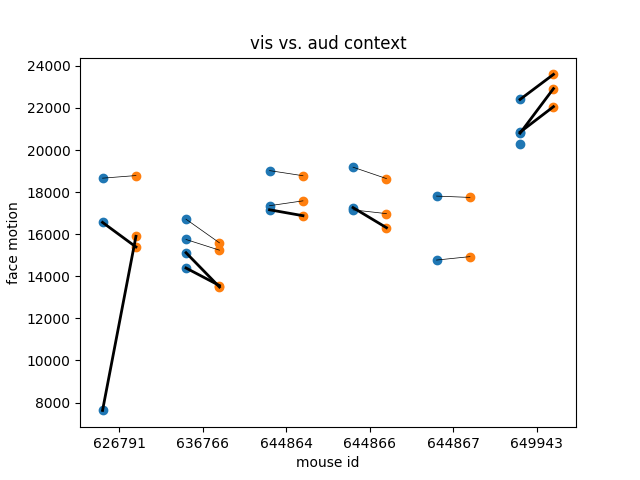

Text(0.5, 1.0, 'vis vs. aud context')

In [681]:
# plot vis vs.aud medians for each mouse

fig,ax=plt.subplots()

mice=behav_diffs['mouse'].unique()
mice_idx=np.arange(0,len(mice))

for mm,mouse in enumerate(mice):
    mouse_df=behav_diffs.query('mouse==@mouse')
    
    ax.plot(np.repeat(mice_idx[mm]-0.2,len(mouse_df)),mouse_df['vis_facemot_median'],
            marker='o',color='tab:blue',linestyle='')
    ax.plot(np.repeat(mice_idx[mm]+0.2,len(mouse_df)),mouse_df['aud_facemot_median'],
            marker='o',color='tab:orange',linestyle='')
    
    for xx in range(0,len(mouse_df)):
        if mouse_df.iloc[xx]['p_facemot_context']<0.01:
            line_width=2
        else:
            line_width=0.5
        ax.plot([mice_idx[mm]-0.2,mice_idx[mm]+0.2],
               mouse_df.iloc[xx][['vis_facemot_median','aud_facemot_median']].values,
                color='k',marker='',linewidth=line_width)
    
#     ax.plot(np.vstack([np.repeat(mice_idx[mm]-0.2,len(mouse_df)),
#                        np.repeat(mice_idx[mm]+0.2,len(mouse_df))]),
#            mouse_df[['vis_median','aud_median']].values.T,color='k',marker='')

ax.set_xticks(mice_idx)
ax.set_xticklabels(mice)

ax.set_xlabel('mouse id')
ax.set_ylabel('face motion')
ax.set_title('vis vs. aud context')

<IPython.core.display.Javascript object>


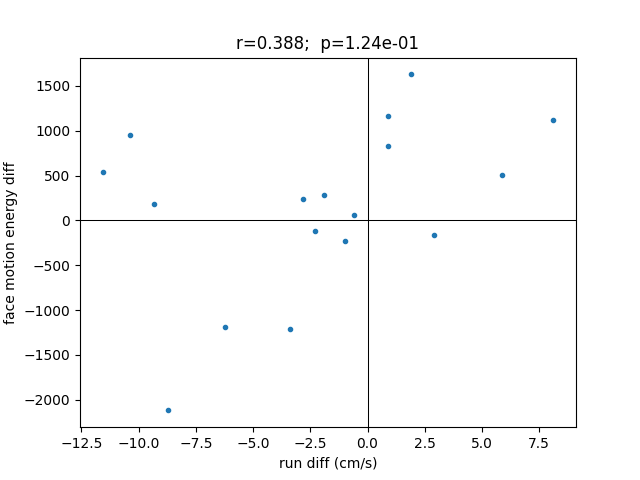

Text(0.5, 1.0, 'r=0.388;  p=1.24e-01')

In [682]:
#removed outlier
fig,ax=plt.subplots(1,1)
ax.axvline(0,color='k',linewidth=0.75)
ax.axhline(0,color='k',linewidth=0.75)
ax.plot(behav_diffs['run_ctxt_diff'][1:],behav_diffs['facemot_ctxt_diff'][1:],'.')


r,p=st.pearsonr(
    behav_diffs['run_ctxt_diff'][np.hstack([False,~np.isnan(behav_diffs['facemot_ctxt_diff'][1:])])],
    behav_diffs['facemot_ctxt_diff'][np.hstack([False,~np.isnan(behav_diffs['facemot_ctxt_diff'][1:])])]
)
ax.set_xlabel('run diff (cm/s)')
ax.set_ylabel('face motion energy diff')
ax.set_title('r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

<IPython.core.display.Javascript object>


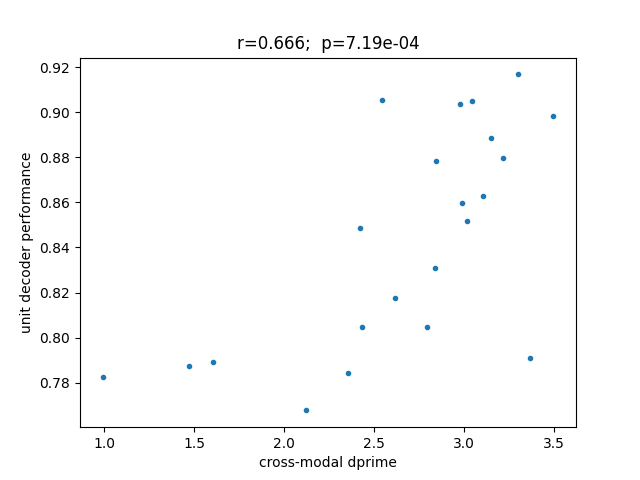

Text(0.5, 1.0, 'r=0.666;  p=7.19e-04')

In [683]:
fig,ax=plt.subplots(1,1)

x_var='mouse_cross_dprime'
y_var='unit_decoder_perf'

ax.plot(behav_diffs[x_var],behav_diffs[y_var],'.')

incl_sessions=(
    ~np.isnan(behav_diffs[x_var])&
    ~np.isnan(behav_diffs[y_var])
)

r,p=st.pearsonr(
    behav_diffs[x_var][incl_sessions],
    behav_diffs[y_var][incl_sessions]
)
ax.set_xlabel('cross-modal dprime')
ax.set_ylabel('unit decoder performance')
ax.set_title('r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

<IPython.core.display.Javascript object>


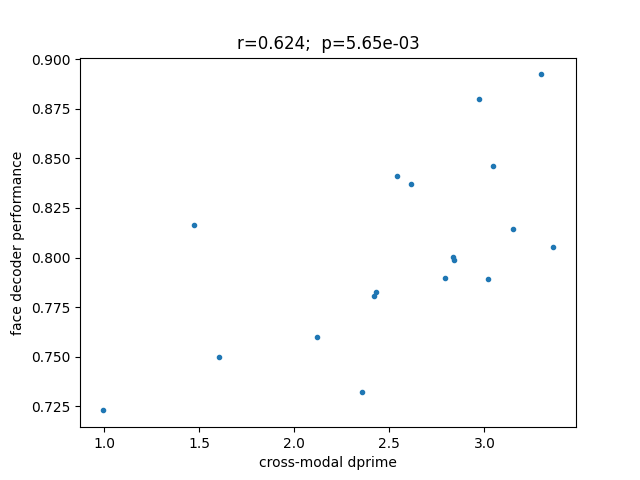

Text(0.5, 1.0, 'r=0.624;  p=5.65e-03')

In [684]:
fig,ax=plt.subplots(1,1)

x_var='mouse_cross_dprime'
y_var='face_decoder_perf'

ax.plot(behav_diffs[x_var],behav_diffs[y_var],'.')

incl_sessions=(
    ~np.isnan(behav_diffs[x_var])&
    ~np.isnan(behav_diffs[y_var])
)

r,p=st.pearsonr(
    behav_diffs[x_var][incl_sessions],
    behav_diffs[y_var][incl_sessions]
)
ax.set_xlabel('cross-modal dprime')
ax.set_ylabel('face decoder performance')
ax.set_title('r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

<IPython.core.display.Javascript object>


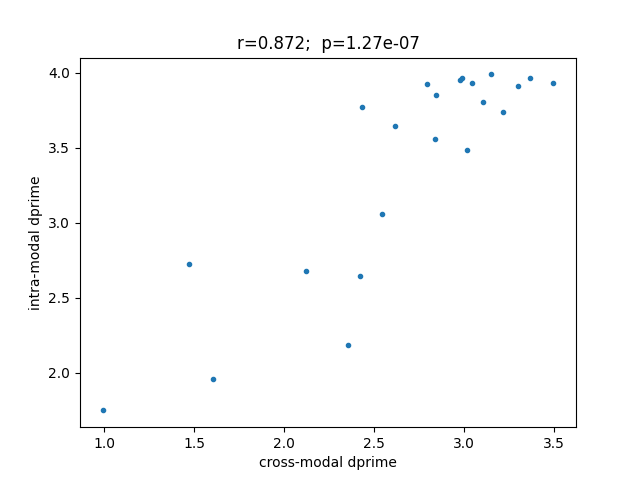

Text(0.5, 1.0, 'r=0.872;  p=1.27e-07')

In [685]:
fig,ax=plt.subplots(1,1)

x_var='mouse_cross_dprime'
y_var='mouse_intra_dprime'

ax.plot(behav_diffs[x_var],behav_diffs[y_var],'.')

incl_sessions=(
    ~np.isnan(behav_diffs[x_var])&
    ~np.isnan(behav_diffs[y_var])
)

r,p=st.pearsonr(
    behav_diffs[x_var][incl_sessions],
    behav_diffs[y_var][incl_sessions]
)
ax.set_xlabel('cross-modal dprime')
ax.set_ylabel('intra-modal dprime')
ax.set_title('r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

<IPython.core.display.Javascript object>


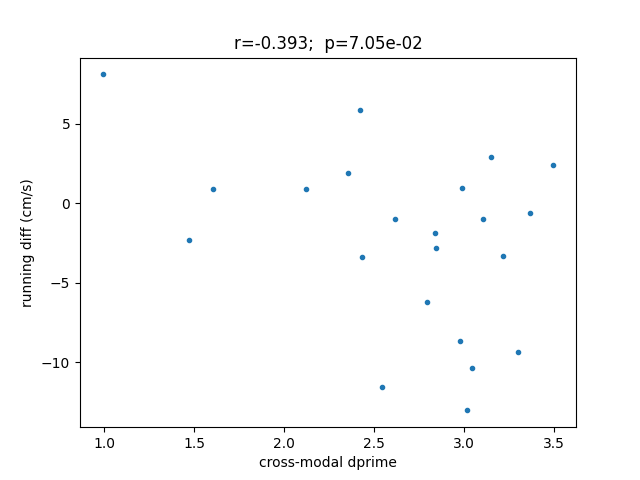

Text(0.5, 1.0, 'r=-0.393;  p=7.05e-02')

In [686]:
fig,ax=plt.subplots(1,1)

x_var='mouse_cross_dprime'
y_var='run_ctxt_diff'

ax.plot(behav_diffs[x_var],behav_diffs[y_var],'.')

incl_sessions=(
    ~np.isnan(behav_diffs[x_var])&
    ~np.isnan(behav_diffs[y_var])
)

r,p=st.pearsonr(
    behav_diffs[x_var][incl_sessions],
    behav_diffs[y_var][incl_sessions]
)
ax.set_xlabel('cross-modal dprime')
ax.set_ylabel('running diff (cm/s)')
ax.set_title('r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

<IPython.core.display.Javascript object>


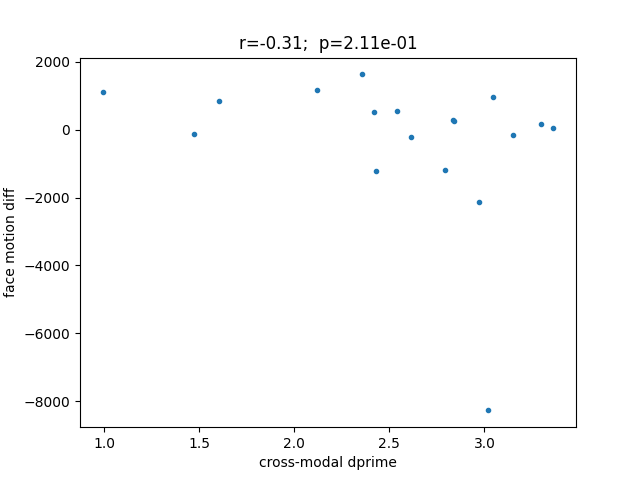

Text(0.5, 1.0, 'r=-0.31;  p=2.11e-01')

In [688]:
fig,ax=plt.subplots(1,1)

x_var='mouse_cross_dprime'
y_var='facemot_ctxt_diff'

ax.plot(behav_diffs[x_var],behav_diffs[y_var],'.')

incl_sessions=(
    ~np.isnan(behav_diffs[x_var])&
    ~np.isnan(behav_diffs[y_var])
)

r,p=st.pearsonr(
    behav_diffs[x_var][incl_sessions],
    behav_diffs[y_var][incl_sessions]
)
ax.set_xlabel('cross-modal dprime')
ax.set_ylabel('face motion diff')
ax.set_title('r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

<IPython.core.display.Javascript object>


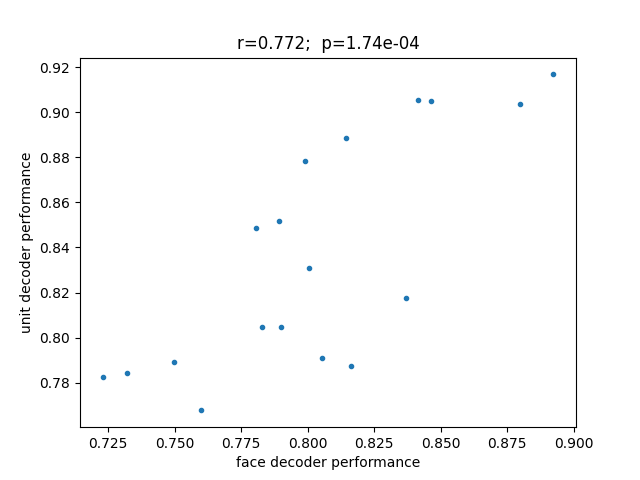

Text(0.5, 1.0, 'r=0.772;  p=1.74e-04')

In [689]:
fig,ax=plt.subplots(1,1)

x_var='face_decoder_perf'
y_var='unit_decoder_perf'

ax.plot(behav_diffs[x_var],behav_diffs[y_var],'.')

incl_sessions=(
    ~np.isnan(behav_diffs[x_var])&
    ~np.isnan(behav_diffs[y_var])
)

r,p=st.pearsonr(
    behav_diffs[x_var][incl_sessions],
    behav_diffs[y_var][incl_sessions]
)
ax.set_xlabel('face decoder performance')
ax.set_ylabel('unit decoder performance')
ax.set_title('r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

In [917]:
# combine across blocks

# combine everything together!!
#run diffs, face motion diffs, overall face & unit decoder performance, mouse behavioral performance


# distribution of running across different contexts 

bins=np.arange(0,60,2)

behav_diffs_by_block={
    'mouse':[],
    'session':[],
    'block':[],
    'vis_run_median':[],
    'aud_run_median':[],
    'run_ctxt_diff':[],
    'p_run_context':[],
    'vis_facemot_median':[],
    'aud_facemot_median':[],
    'facemot_ctxt_diff':[],
    'p_facemot_context':[],
    'unit_decoder_perf':[],
    'face_decoder_perf':[],
    'mouse_cross_dprime':[],
    'mouse_intra_dprime':[],
}

#TODO: assess decoding accuracy by block
decoder_unit_perf = np.nanmean(np.vstack([decoder_acc_session_mean['all']['block_ids']['vis1'],
                                          decoder_acc_session_mean['all']['block_ids']['sound1']]),axis=0)
decoder_face_perf = np.nanmean(np.vstack([decoder_acc_session_mean_face[0]['block_ids']['vis1'],
                                          decoder_acc_session_mean_face[0]['block_ids']['sound1']]),axis=0)

for sel_session in range(0,len(sessions)):#sessions:
    
    if 'trialOptoVoltage' in sessions[sel_session].trials.columns:
        trials=sessions[sel_session].trials.query('trialOptoVoltage.isnull()')
        trials=trials.reset_index()
    else:
        trials=sessions[sel_session].trials
        
    for block in sessions[sel_session].trials['block_number'].unique():
        if np.isnan(block):
            continue
            
        block_trials=trials.query('block_number==@block')
        
        #context diffs
        vis_context_trials=block_trials.query('trialstimRewarded == "vis1" and \
                                                               vis_autoreward_trials == False and \
                                                               aud_autoreward_trials == False')
        aud_context_trials=block_trials.query('trialstimRewarded == "sound1" and \
                                                               vis_autoreward_trials == False and \
                                                               aud_autoreward_trials == False')

        vis_context_running=vis_context_trials['avg_run_speed'].values
        aud_context_running=aud_context_trials['avg_run_speed'].values
        h_ctxt_running,p_ctxt_running=st.ranksums(vis_context_running, aud_context_running)

        vis_context_facemot=vis_context_trials['behav_motion'].values
        aud_context_facemot=aud_context_trials['behav_motion'].values
        h_ctxt_facemot,p_ctxt_facemot=st.ranksums(vis_context_facemot, aud_context_facemot)
        
        
        #block pred vs. true context
        if len(svc_results_face[sel_session]['block_ids'][0][0])>0:
            pred_face_labels=svc_results_face[sel_session]['block_ids'][0][0][0]['pred_label'][block_trials.index]
            true_face_labels=svc_results_face[sel_session]['block_ids'][0][0][0]['true_label'][block_trials.index]
            block_face_decoder_acc=np.mean(pred_face_labels==true_face_labels)
        else:
            block_face_decoder_acc=np.nan
            
        if len(svc_results[sel_session]['block_ids']['all'][0])>0:
            pred_labels=svc_results[sel_session]['block_ids']['all'][0][0]['pred_label'][block_trials.index]
            true_labels=svc_results[sel_session]['block_ids']['all'][0][0]['true_label'][block_trials.index]
            block_decoder_acc=np.mean(pred_labels==true_labels)
        else:
            block_decoder_acc=np.nan
        
        #mouse performance
        hit_pct=np.mean(np.hstack([block_trials.query(
            'trialstimRewarded=="vis1" and trialStimID=="vis1" and vis_autoreward_trials==False'
        )['trial_response'],
        sessions[0].trials.query(
            'trialstimRewarded=="sound1" and trialStimID=="sound1" and aud_autoreward_trials==False'
        )['trial_response']]))

        cross_fa_pct=np.mean(np.hstack([block_trials.query(
            'trialstimRewarded=="vis1" and trialStimID=="sound1" and aud_autoreward_trials==False'
        )['trial_response'],
        sessions[0].trials.query(
            'trialstimRewarded=="sound1" and trialStimID=="vis1" and vis_autoreward_trials==False'
        )['trial_response']]))

        inter_fa_pct=np.mean(np.hstack([block_trials.query(
            'trialstimRewarded=="vis1" and trialStimID=="vis2" and vis_autoreward_trials==False'
        )['trial_response'],
        sessions[0].trials.query(
            'trialstimRewarded=="sound1" and trialStimID=="sound2" and aud_autoreward_trials==False'
        )['trial_response']]))
        if hit_pct==1:
            hit_pct=0.99
        elif hit_pct==0:
            hit_pct=0.01      
        if cross_fa_pct==1:
            cross_fa_pct=0.99
        elif cross_fa_pct==0:
            cross_fa_pct=0.01
        if inter_fa_pct==1:
            inter_fa_pct=0.99
        elif inter_fa_pct==0:
            inter_fa_pct=0.01

        cross_modal_dprime=(st.norm.ppf(hit_pct) - st.norm.ppf(cross_fa_pct))
        intra_modal_dprime=(st.norm.ppf(hit_pct) - st.norm.ppf(inter_fa_pct))

        behav_diffs_by_block['mouse'].append(sessions[sel_session].metadata['mouseID'])
        behav_diffs_by_block['session'].append(sessions[sel_session].metadata['ephys_session_num'])
        behav_diffs_by_block['block'].append(block)
        behav_diffs_by_block['vis_run_median'].append(np.median(vis_context_running))
        behav_diffs_by_block['aud_run_median'].append(np.median(aud_context_running))
        behav_diffs_by_block['run_ctxt_diff'].append(np.median(vis_context_running)-
                                          np.median(aud_context_running))
        behav_diffs_by_block['p_run_context'].append(p_ctxt_running)

        behav_diffs_by_block['vis_facemot_median'].append(np.median(vis_context_facemot))
        behav_diffs_by_block['aud_facemot_median'].append(np.median(aud_context_facemot))
        behav_diffs_by_block['facemot_ctxt_diff'].append(np.median(vis_context_facemot)-
                                              np.median(aud_context_facemot))
        behav_diffs_by_block['p_facemot_context'].append(p_ctxt_facemot)

        behav_diffs_by_block['unit_decoder_perf'].append(block_decoder_acc)
        behav_diffs_by_block['face_decoder_perf'].append(block_face_decoder_acc)

        behav_diffs_by_block['mouse_cross_dprime'].append(cross_modal_dprime)
        behav_diffs_by_block['mouse_intra_dprime'].append(intra_modal_dprime)

    
    
behav_diffs=pd.DataFrame.from_dict(behav_diffs)

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\1297318565.py:32: RuntimeWarning: Mean of empty slice
  decoder_face_perf = np.nanmean(np.vstack([decoder_acc_session_mean_face[0]['block_ids']['vis1'],
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\scipy\stats\_stats_py.py:8162: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\scipy\stats\_stats_py.py:8162: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packa

C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\scipy\stats\_stats_py.py:8162: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\scipy\stats\_stats_py.py:8162: RuntimeWarning: invalid

C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\scipy\stats\_stats_py.py:8162: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\scipy\stats\_stats_py.py:8162: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\_methods.py:189: Runtime

C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\scipy\stats\_stats_py.py:8162: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\scipy\stats\_stats_py.py:8162: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\_methods.py:189: Runtime

C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\scipy\stats\_stats_py.py:8162: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\scipy\stats\_stats_py.py:8162: RuntimeWarning: invalid

C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\scipy\stats\_stats_py.py:8162: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\scipy\stats\_stats_py.py:8162: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\_methods.py:189: Runtime

C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\scipy\stats\_stats_py.py:8162: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\scipy\stats\_stats_py.py:8162: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\_methods.py:189: Runtime

C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\scipy\stats\_stats_py.py:8162: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\scipy\stats\_stats_py.py:8162: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\core\_methods.py:189: Runtime

In [916]:
incl_sessions
np.array(behav_diffs_by_block[x_var])[incl_sessions]
hit_pct

0.999

<IPython.core.display.Javascript object>


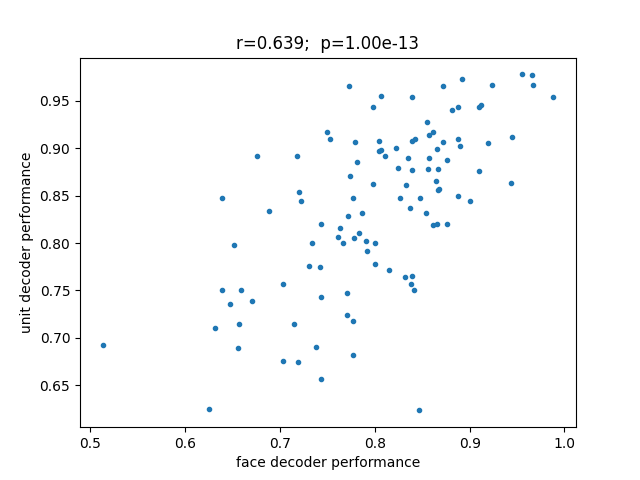

Text(0.5, 1.0, 'r=0.639;  p=1.00e-13')

In [919]:
fig,ax=plt.subplots(1,1)

x_var='face_decoder_perf'
y_var='unit_decoder_perf'

ax.plot(behav_diffs_by_block[x_var],behav_diffs_by_block[y_var],'.')

incl_sessions=(
    ~np.isnan(behav_diffs_by_block[x_var])&
    ~np.isnan(behav_diffs_by_block[y_var])
)

r,p=st.pearsonr(
    np.array(behav_diffs_by_block[x_var])[incl_sessions],
    np.array(behav_diffs_by_block[y_var])[incl_sessions]
)
ax.set_xlabel('face decoder performance')
ax.set_ylabel('unit decoder performance')
ax.set_title('r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

In [892]:
block_trials= sessions[sel_session].trials.query('block_number==1')
pred_labels=svc_results_face[sel_session]['block_ids'][0][0][0]['pred_label'][block_trials.index]
true_labels=svc_results_face[sel_session]['block_ids'][0][0][0]['true_label'][block_trials.index]
block_decoder_acc=np.mean(pred_labels==true_labels)

0.9101123595505618

In [893]:
pred_labels=svc_results[sel_session]['block_ids']['all'][0][0]['pred_label'][block_trials.index]
true_labels=svc_results[sel_session]['block_ids']['all'][0][0]['true_label'][block_trials.index]
block_decoder_acc=np.mean(pred_labels==true_labels)
block_decoder_acc

0.8764044943820225

In [889]:
sessions[sel_session].trials.query('block_number==1')

trialStartFrame trialStimID trialstimRewarded  trial_response  \
0                 0      sound1            sound1            True   
1               535      sound1            sound1            True   
2               938      sound1            sound1            True   
3              1310      sound1            sound1            True   
4              1656      sound1            sound1            True   
..              ...         ...               ...             ...   
84            34189        vis1            sound1            True   
85            34597        vis1            sound1            True   
86            34998      sound2            sound1           False   
87            35375      sound1            sound1            True   
88            35725        vis1            sound1            True   

    trial_rewarded  trial_sound_dur  trial_vis_stim_dur  vis_go_trials  \
0             True              0.5                 0.0          False   
1             True              0.5                 0.0          False   
2             True              0.5                 0.0          False   
3             True              0.5                 0.0          False   
4             True              0.5                 0.0          False   
..             ...              ...                 ...            ...   
84           False              0.0                 0.5           True   
85           False              0.0                 0.5           True   
86           False              0.5                 0.0          False   
87            True              0.5                 0.0          False   
88           False              0.0                 0.5           True   

    vis_nogo_trials  vis_hit_trials  ...  behav_SVD_42  behav_SVD_43  \
0             False           False  ...    -20.076614      2.540320   
1             False           False  ...      8.500819     -4.754187   
2             False           False  ...    -18.497462     -9.339008   
3             False           False  ...      9.938801     -9.085813   
4             False           False  ...     -8.200384      3.354041   
..              ...             ...  ...           ...           ...   
84            False            True  ...      1.328868     -9.418090   
85            False            True  ...     11.964402     12.105884   
86            False           False  ...     13.341732     -4.189750   
87            False           False  ...      3.341117    -17.734224   
88            False            True  ...     -2.788318    -12.837822   

    behav_SVD_44  behav_SVD_45  behav_SVD_46  behav_SVD_47  behav_SVD_48  \
0       6.361017     -8.259133     -1.239787     18.914824     11.589403   
1       1.895113     -3.794615     -6.862256      6.296848      0.667970   
2      11.169974    -23.361155     -3.134306      6.521989     19.719046   
3       9.265271     -0.573532     -3.051783      1.127882     -4.079705   
4       6.209970    -21.377669     15.494277      2.410677      3.887615   
..           ...           ...           ...           ...           ...   
84     13.791984    -13.417222      2.388973     -2.032627      2.768177   
85     -7.774279     -1.832877     10.455507      0.735060    -14.616145   
86      1.041557     -6.548806      3.053488      4.459245      4.906164   
87     13.676984     -6.798166      5.148774      6.170255     -2.180526   
88      3.818632     -7.785150     -2.462464     17.972343      3.521373   

    behav_SVD_49  block_number  block_transition  
0       1.489167           1.0              True  
1       1.899835           1.0             False  
2     -11.263301           1.0             False  
3       2.067042           1.0             False  
4      -8.473822           1.0             False  
..           ...           ...               ...  
84     12.845674           1.0             False  
85     -7.239308           1.0             False  
86      8.771110           1.0             False 

In [880]:
svc_results_face[sel_session]['block_ids'][0][0][0].keys()

dict_keys(['cr', 'pred_label', 'true_label', 'trial_sel_idx', 'trials_used', 'decision_function', 'coefs', 'classes', 'intercept', 'params', 'shuffle', 'feature_sel_idx'])

In [879]:
svc_results[0]['block_ids']['all'][0][0].keys()

dict_keys(['cr', 'pred_label', 'true_label', 'trial_sel_idx', 'trials_used', 'decision_function', 'coefs', 'classes', 'intercept', 'params', 'shuffle', 'unit_sel_idx'])

In [693]:
#add "block number" to trials table

# get block IDs per trial

for ss in sessions:
    block_transitions=np.where(
        sessions[ss].trials['trialstimRewarded'][:-1].values!=
        sessions[ss].trials['trialstimRewarded'][1:].values)[0]+1
    block_transitions=np.hstack([0,block_transitions,len(sessions[ss].trials)-1])

    block_number=np.zeros(len(sessions[ss].trials))
    block_number[:]=np.nan

    for bb in range(1,len(block_transitions)):
        block_number[block_transitions[bb-1]:block_transitions[bb]]=bb
    
    block_transitions_bool=np.zeros(len(sessions[ss].trials),dtype=bool)
    block_transitions_bool[block_transitions]=True
    sessions[ss].trials['block_number']=block_number
    sessions[ss].trials['block_transition']=block_transitions_bool

In [767]:
#plot decoder confidence for block transitions

pre_trials=10
post_trials=15

face_decoder={
    'first_block_vis':[],
    'first_block_aud':[],
    'vis_to_aud':[],
    'aud_to_vis':[],
}

unit_decoder={
    'first_block_vis':[],
    'first_block_aud':[],
    'vis_to_aud':[],
    'aud_to_vis':[],
}

for sel_session in range(0,len(sessions)):

    block_transitions = np.where(sessions[sel_session].trials['block_transition'])[0]
    
    if 'block_ids' in sessions[sel_session].decoder_face['dec_func'][0]:
        face_stdev=np.nanstd(sessions[sel_session].decoder_face['dec_func'][0]['block_ids'])
        
    if 'block_ids' in sessions[sel_session].decoder['dec_func']['all']:
        unit_stdev=np.nanstd(sessions[sel_session].decoder['dec_func']['all']['block_ids'])
    
    if sessions[sel_session].trials['trialstimRewarded'].iloc[0]=='vis1':
        if 'block_ids' in sessions[sel_session].decoder_face['dec_func'][0]:
            dec_conf=sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][0:post_trials]/face_stdev
            if len(dec_conf)>0:
                face_decoder['first_block_vis'].append(dec_conf)
        if 'block_ids' in sessions[sel_session].decoder['dec_func']['all']:
            dec_conf=sessions[sel_session].decoder['dec_func']['all']['block_ids'][0:post_trials]/unit_stdev
            if len(dec_conf)>0:
                unit_decoder['first_block_vis'].append(dec_conf)

    elif sessions[sel_session].trials['trialstimRewarded'].iloc[0]=='sound1':
        if 'block_ids' in sessions[sel_session].decoder_face['dec_func'][0]:
            dec_conf=sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][0:post_trials]/face_stdev
            if len(dec_conf)>0:
                face_decoder['first_block_aud'].append(dec_conf)
        if 'block_ids' in sessions[sel_session].decoder['dec_func']['all']:
            dec_conf=sessions[sel_session].decoder['dec_func']['all']['block_ids'][0:post_trials]/unit_stdev
            if len(dec_conf)>0:
                unit_decoder['first_block_aud'].append(dec_conf)

    for bt in block_transitions[1:-1]:

        if sessions[sel_session].trials['trialstimRewarded'].iloc[bt]=='vis1':
            if 'block_ids' in sessions[sel_session].decoder_face['dec_func'][0]:
                dec_conf=sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][bt-pre_trials:bt+post_trials]/face_stdev
                if len(dec_conf)>0:
                    face_decoder['aud_to_vis'].append(dec_conf)
            if 'block_ids' in sessions[sel_session].decoder['dec_func']['all']:
                dec_conf=sessions[sel_session].decoder['dec_func']['all']['block_ids'][bt-pre_trials:bt+post_trials]/unit_stdev
                if len(dec_conf)>0:
                    unit_decoder['aud_to_vis'].append(dec_conf)

        elif sessions[sel_session].trials['trialstimRewarded'].iloc[bt]=='sound1':
            if 'block_ids' in sessions[sel_session].decoder_face['dec_func'][0]:
                dec_conf=sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][bt-pre_trials:bt+post_trials]/face_stdev
                if len(dec_conf)>0:
                    face_decoder['vis_to_aud'].append(dec_conf)
            if 'block_ids' in sessions[sel_session].decoder['dec_func']['all']:
                dec_conf=sessions[sel_session].decoder['dec_func']['all']['block_ids'][bt-pre_trials:bt+post_trials]/unit_stdev
                if len(dec_conf)>0:
                    unit_decoder['vis_to_aud'].append(dec_conf)


#sessions[sel_session].decoder_face['dec_func'][0]['block_ids']
#sessions[sel_session].decoder['dec_func']['all']['block_ids']

<IPython.core.display.Javascript object>


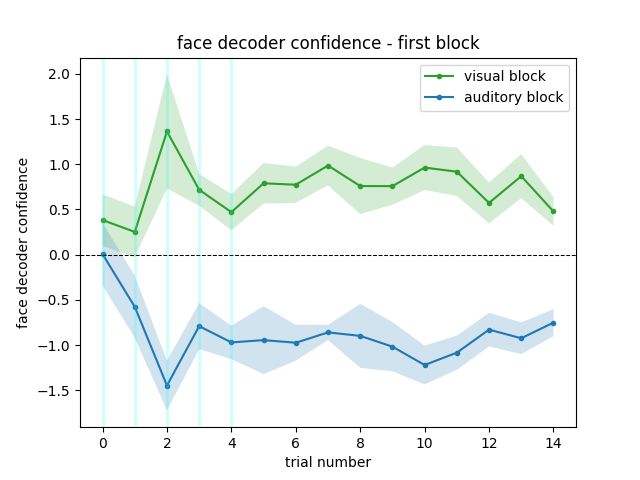

In [1009]:
xvect=np.arange(0,post_trials)

fig,ax=plt.subplots(1,1)

y=np.mean(np.vstack(face_decoder['first_block_vis']),axis=0)
err=st.sem(np.vstack(face_decoder['first_block_vis']),axis=0)
ax.plot(xvect, y, 'tab:green',linestyle='-',marker='.')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=np.mean(np.vstack(face_decoder['first_block_aud']),axis=0)
err=st.sem(np.vstack(face_decoder['first_block_aud']),axis=0)
ax.plot(xvect, y, 'tab:blue',linestyle='-',marker='.')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

# ax.plot(np.mean(np.vstack(face_decoder['first_block_vis']),0),'g.-')
# ax.plot(np.mean(np.vstack(face_decoder['first_block_aud']),0),'b.-')
ax.axhline(0,color='k',linewidth=0.75,linestyle='--')
for xx in range(0,5):
    ax.axvline(xx,color='cyan',alpha=0.2,linewidth=2)
    
ax.set_xlabel('trial number')
ax.set_ylabel('face decoder confidence')
ax.set_title('face decoder confidence - first block')
ax.legend(['visual block','auditory block'])

<IPython.core.display.Javascript object>


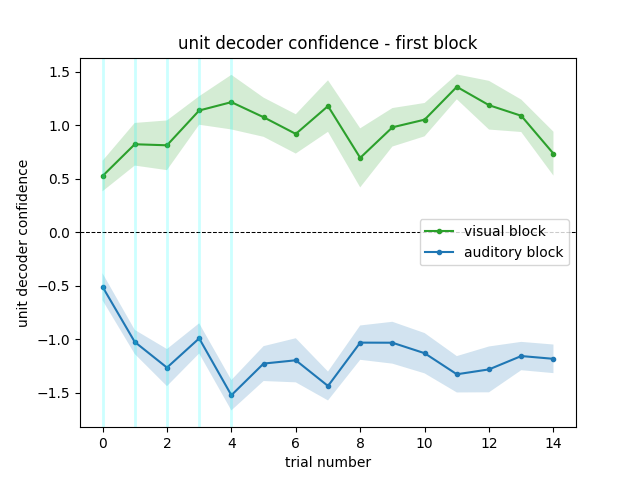

In [1010]:
fig,ax=plt.subplots(1,1)

y=np.mean(np.vstack(unit_decoder['first_block_vis']),axis=0)
err=st.sem(np.vstack(unit_decoder['first_block_vis']),axis=0)
ax.plot(xvect, y, 'tab:green',linestyle='-',marker='.')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=np.mean(np.vstack(unit_decoder['first_block_aud']),axis=0)
err=st.sem(np.vstack(unit_decoder['first_block_aud']),axis=0)
ax.plot(xvect, y, 'tab:blue',linestyle='-',marker='.')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

# ax.plot(np.mean(np.vstack(unit_decoder['first_block_vis']),0),'g.-')
# ax.plot(np.mean(np.vstack(unit_decoder['first_block_aud']),0),'b.-')
ax.axhline(0,color='k',linewidth=0.75,linestyle='--')
for xx in range(0,5):
    ax.axvline(xx,color='cyan',alpha=0.2,linewidth=2)
    
ax.set_xlabel('trial number')
ax.set_ylabel('unit decoder confidence')
ax.set_title('unit decoder confidence - first block')
ax.legend(['visual block','auditory block'])

<IPython.core.display.Javascript object>


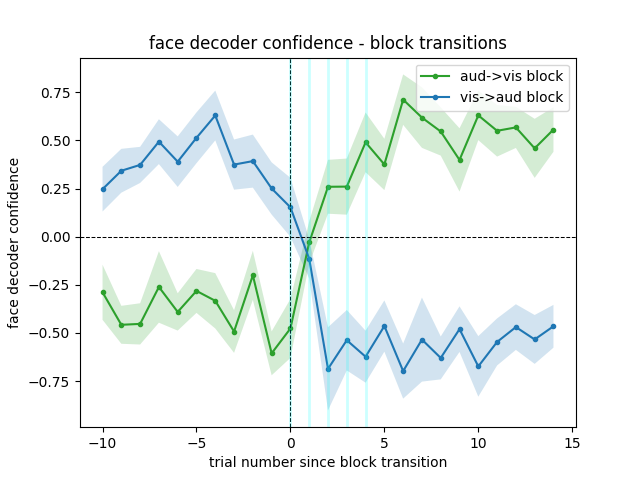

In [1011]:
xvect=np.arange(-pre_trials,post_trials)
fig,ax=plt.subplots(1,1)

y=np.mean(np.vstack(face_decoder['aud_to_vis']),axis=0)
err=st.sem(np.vstack(face_decoder['aud_to_vis']),axis=0)
ax.plot(xvect, y, 'tab:green',linestyle='-',marker='.')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=np.mean(np.vstack(face_decoder['vis_to_aud']),axis=0)
err=st.sem(np.vstack(face_decoder['vis_to_aud']),axis=0)
ax.plot(xvect, y, 'tab:blue',linestyle='-',marker='.')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

# ax.plot(xvect,np.mean(np.vstack(face_decoder['aud_to_vis']),0),'g.-')
# ax.plot(xvect,np.mean(np.vstack(face_decoder['vis_to_aud']),0),'b.-')
ax.axhline(0,color='k',linewidth=0.75,linestyle='--')
ax.axvline(0,color='k',linewidth=0.75,linestyle='--')
for xx in range(0,5):
    ax.axvline(xx,color='cyan',alpha=0.2,linewidth=2)
    
ax.set_xlabel('trial number since block transition')
ax.set_ylabel('face decoder confidence')
ax.set_title('face decoder confidence - block transitions')
ax.legend(['aud->vis block','vis->aud block'])

<IPython.core.display.Javascript object>


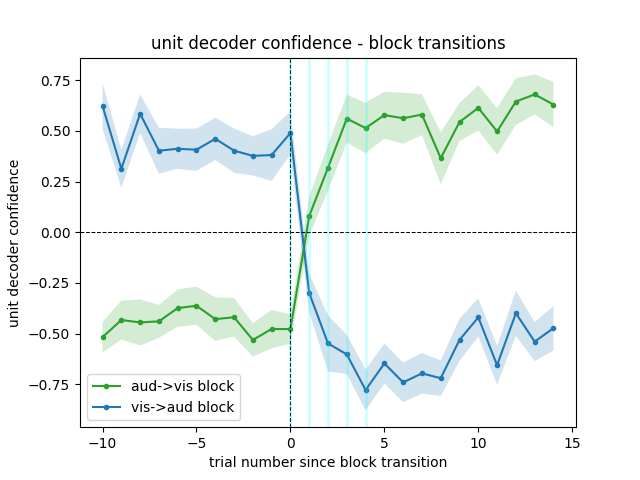

In [1013]:
xvect=np.arange(-pre_trials,post_trials)
fig,ax=plt.subplots(1,1)

y=np.mean(np.vstack(unit_decoder['aud_to_vis']),axis=0)
err=st.sem(np.vstack(unit_decoder['aud_to_vis']),axis=0)
ax.plot(xvect, y, 'tab:green',linestyle='-',marker='.')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=np.mean(np.vstack(unit_decoder['vis_to_aud']),axis=0)
err=st.sem(np.vstack(unit_decoder['vis_to_aud']),axis=0)
ax.plot(xvect, y, 'tab:blue',linestyle='-',marker='.')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

# ax.plot(xvect,np.mean(np.vstack(unit_decoder['aud_to_vis']),0),'g.-')
# ax.plot(xvect,np.mean(np.vstack(unit_decoder['vis_to_aud']),0),'b.-')
ax.axhline(0,color='k',linewidth=0.75,linestyle='--')
ax.axvline(0,color='k',linewidth=0.75,linestyle='--')
for xx in range(0,5):
    ax.axvline(xx,color='cyan',alpha=0.2,linewidth=2)
    
ax.set_xlabel('trial number since block transition')
ax.set_ylabel('unit decoder confidence')
ax.set_title('unit decoder confidence - block transitions')
ax.legend(['aud->vis block','vis->aud block'])

<IPython.core.display.Javascript object>


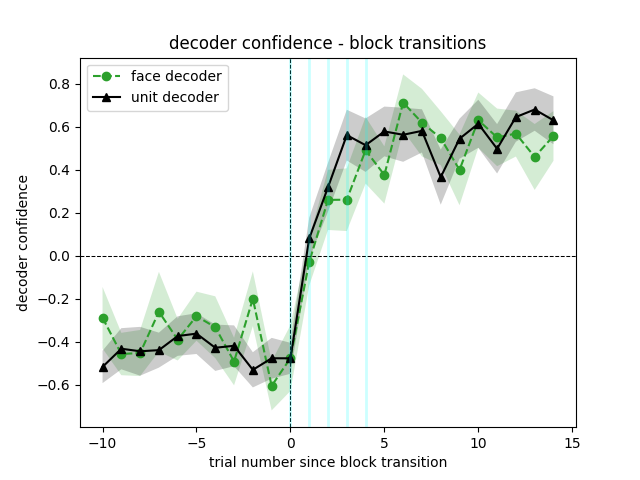

In [1019]:
#direct comp unit vs face decoder

xvect=np.arange(-pre_trials,post_trials)
fig,ax=plt.subplots(1,1)

y=np.mean(np.vstack(face_decoder['aud_to_vis']),axis=0)
err=st.sem(np.vstack(face_decoder['aud_to_vis']),axis=0)
ax.plot(xvect, y, 'tab:green',linestyle='--',marker='o')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=np.mean(np.vstack(unit_decoder['aud_to_vis']),axis=0)
err=st.sem(np.vstack(unit_decoder['aud_to_vis']),axis=0)
ax.plot(xvect, y, 'k',linestyle='-',marker='^')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='k')

# ax.plot(xvect,np.mean(np.vstack(face_decoder['aud_to_vis']),0),'g.-')
# ax.plot(xvect,np.mean(np.vstack(face_decoder['vis_to_aud']),0),'b.-')
ax.axhline(0,color='k',linewidth=0.75,linestyle='--')
ax.axvline(0,color='k',linewidth=0.75,linestyle='--')
for xx in range(0,5):
    ax.axvline(xx,color='cyan',alpha=0.2,linewidth=2)
    
ax.set_xlabel('trial number since block transition')
ax.set_ylabel('decoder confidence')
ax.set_title('decoder confidence - block transitions')
ax.legend(['face decoder','unit decoder'])

<IPython.core.display.Javascript object>


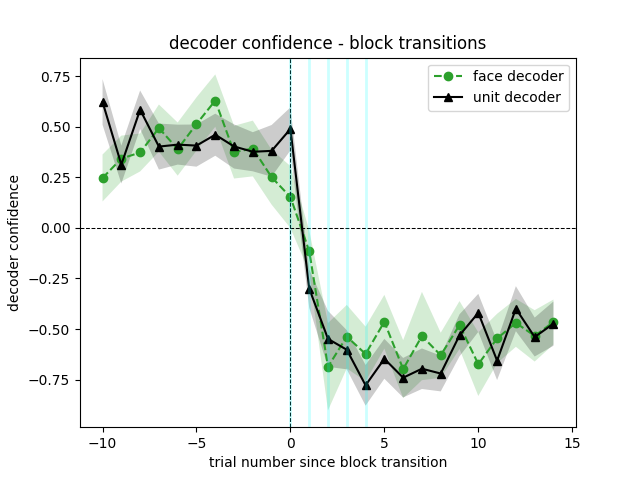

In [1020]:
#direct comp unit vs face decoder

xvect=np.arange(-pre_trials,post_trials)
fig,ax=plt.subplots(1,1)

y=np.mean(np.vstack(face_decoder['vis_to_aud']),axis=0)
err=st.sem(np.vstack(face_decoder['vis_to_aud']),axis=0)
ax.plot(xvect, y, 'tab:green',linestyle='--',marker='o')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=np.mean(np.vstack(unit_decoder['vis_to_aud']),axis=0)
err=st.sem(np.vstack(unit_decoder['vis_to_aud']),axis=0)
ax.plot(xvect, y, 'k',linestyle='-',marker='^')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='k')

# ax.plot(xvect,np.mean(np.vstack(face_decoder['aud_to_vis']),0),'g.-')
# ax.plot(xvect,np.mean(np.vstack(face_decoder['vis_to_aud']),0),'b.-')
ax.axhline(0,color='k',linewidth=0.75,linestyle='--')
ax.axvline(0,color='k',linewidth=0.75,linestyle='--')
for xx in range(0,5):
    ax.axvline(xx,color='cyan',alpha=0.2,linewidth=2)
    
ax.set_xlabel('trial number since block transition')
ax.set_ylabel('decoder confidence')
ax.set_title('decoder confidence - block transitions')
ax.legend(['face decoder','unit decoder'])

In [735]:
np.mean(np.vstack(face_decoder['aud_to_vis']),0)
xvect

array([], dtype=int32)

In [ ]:
fig,ax=plt.subplots(2,1)

var_exp=behav_info.item()['motSv']/np.sum(behav_info.item()['motSv'])

ax[0].plot(var_exp)
ax[0].set_xlabel('feature')
ax[0].set_ylabel('proportion of variance explained')

ax[1].plot(np.cumsum(var_exp))
ax[1].set_xlabel('feature')
ax[1].set_ylabel('cumulative proportion of variance explained')

In [ ]:
# fig,ax=plt.subplots(1,1)

# var_exp=behav_info.item()['motSv']/np.sum(behav_info.item()['motSv'])

# ax.plot(np.cumsum(var_exp))
# ax.set_xlabel('feature')
# ax.set_ylabel('cumulative proportion of variance explained')

In [822]:
behav_info.item()['motMask_reshape'][1].shape

(61, 99, 500)

<IPython.core.display.Javascript object>


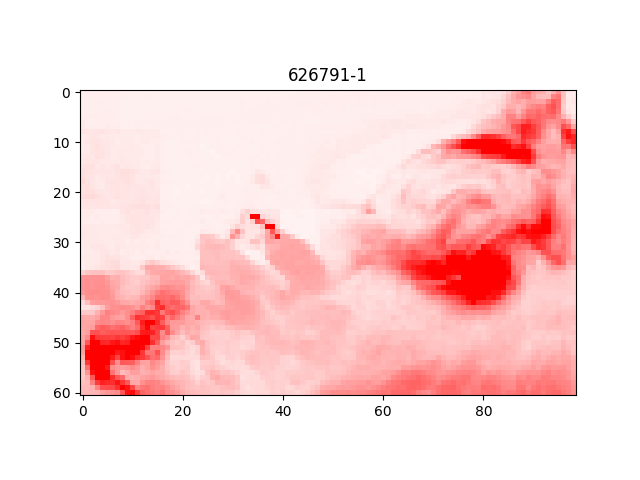

<IPython.core.display.Javascript object>


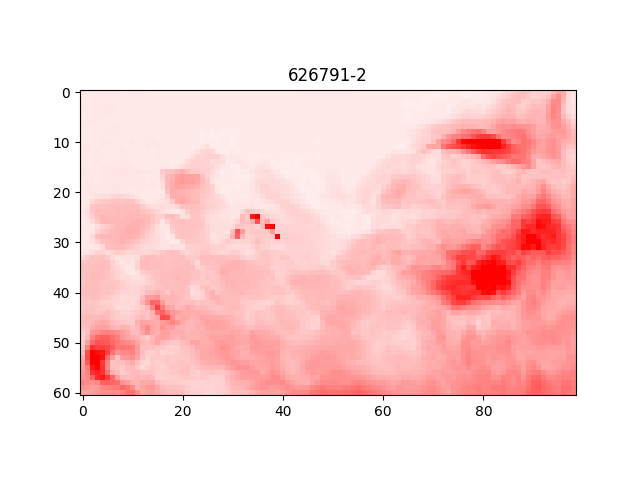

<IPython.core.display.Javascript object>


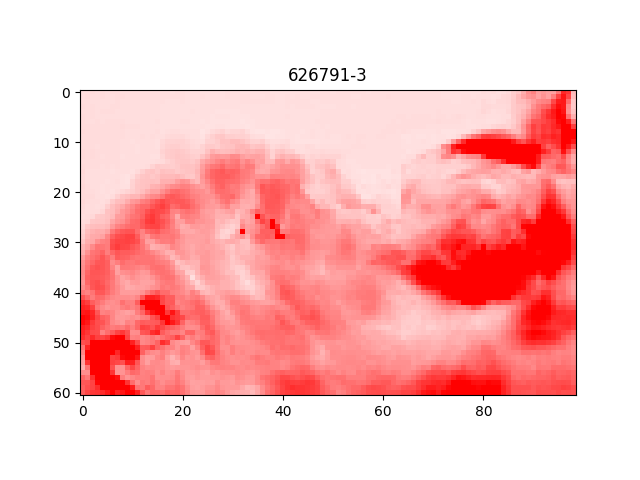

<IPython.core.display.Javascript object>


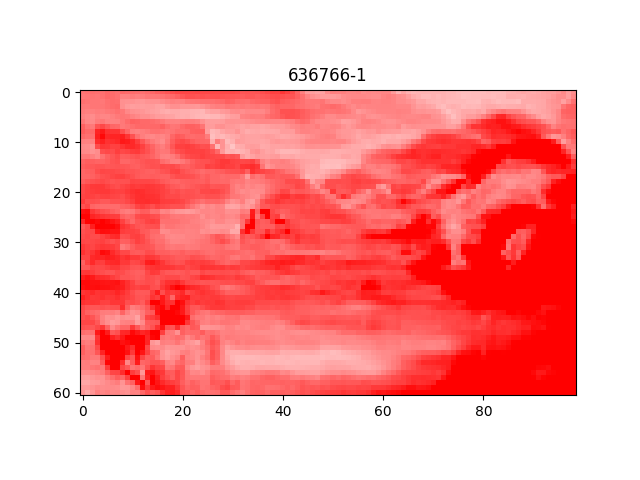

<IPython.core.display.Javascript object>


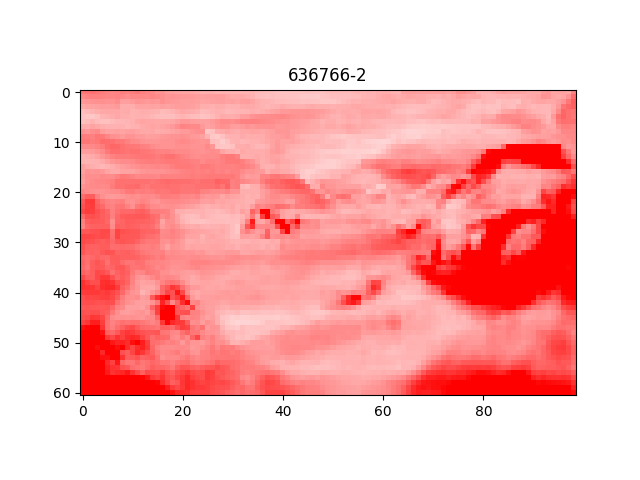

<IPython.core.display.Javascript object>


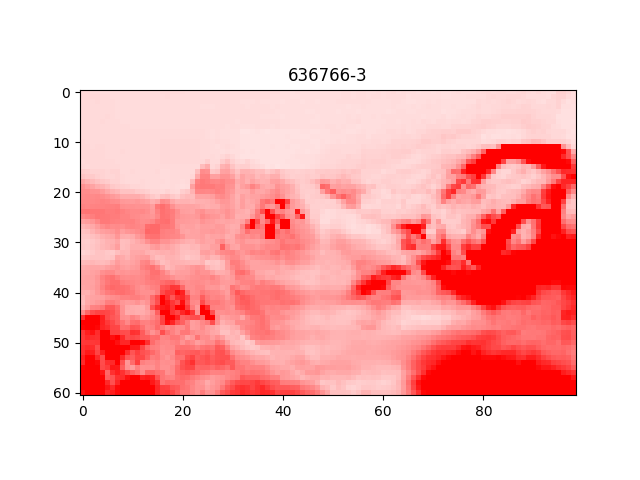

<IPython.core.display.Javascript object>


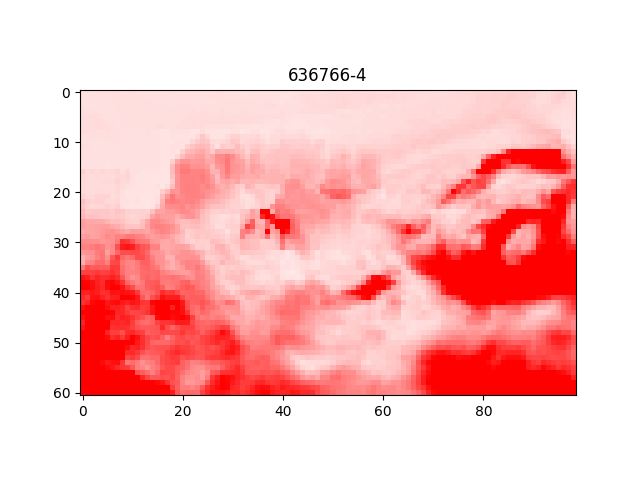

<IPython.core.display.Javascript object>


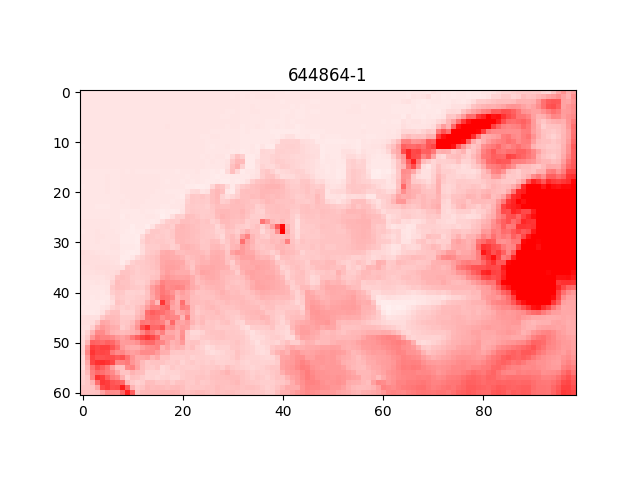

<IPython.core.display.Javascript object>


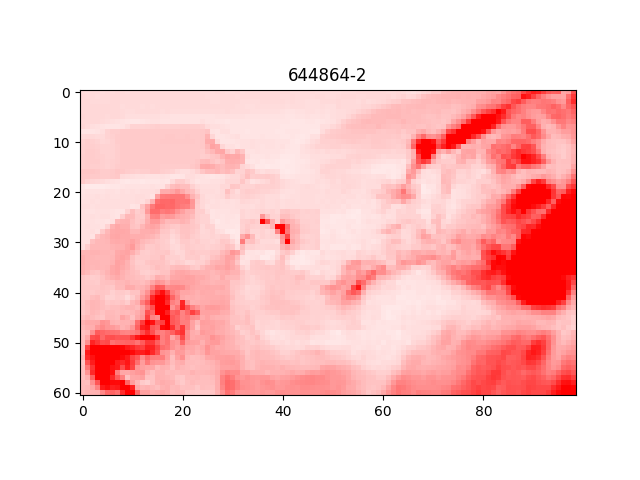

<IPython.core.display.Javascript object>


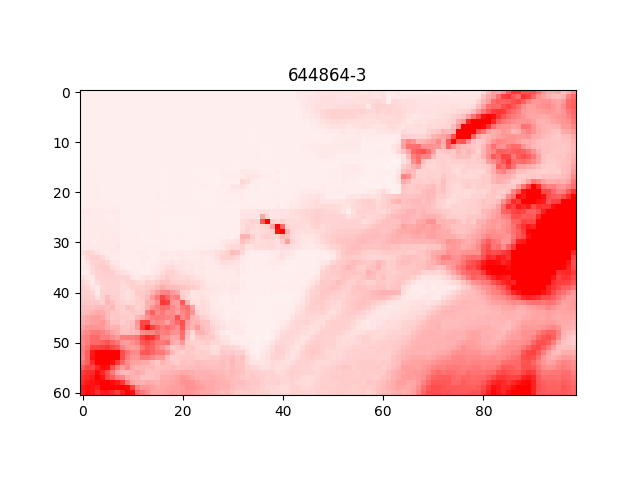

<IPython.core.display.Javascript object>


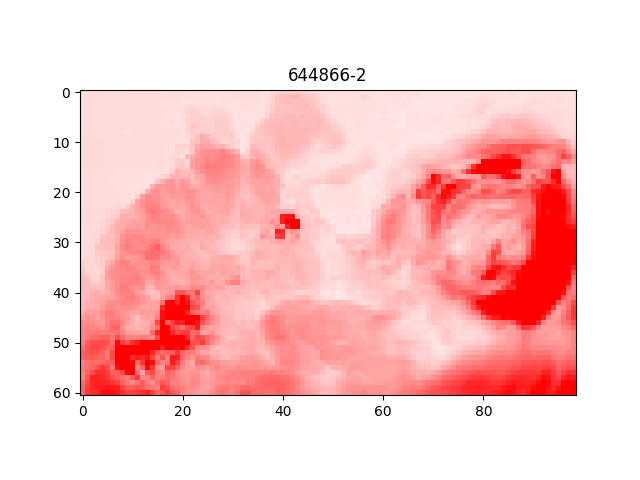

<IPython.core.display.Javascript object>


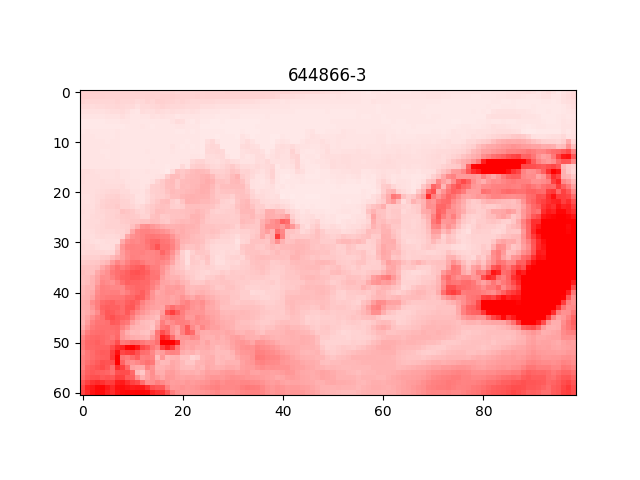

<IPython.core.display.Javascript object>


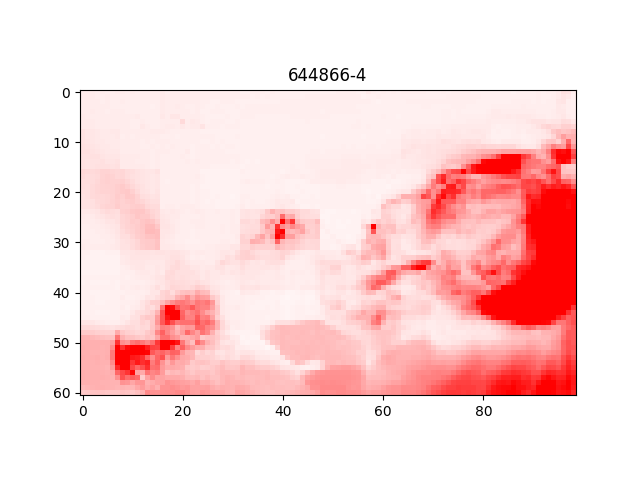

<IPython.core.display.Javascript object>


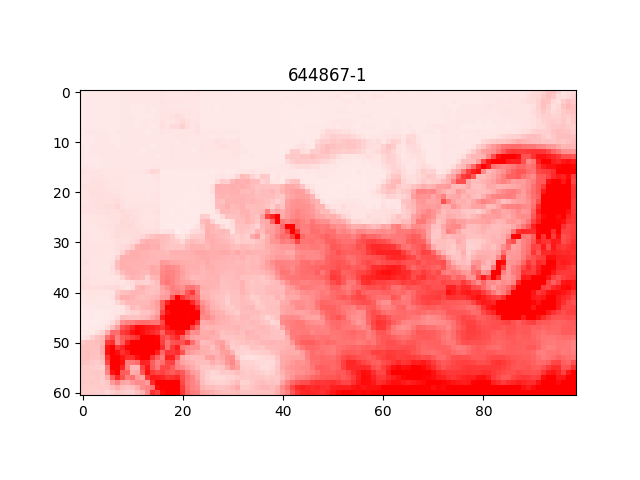

<IPython.core.display.Javascript object>


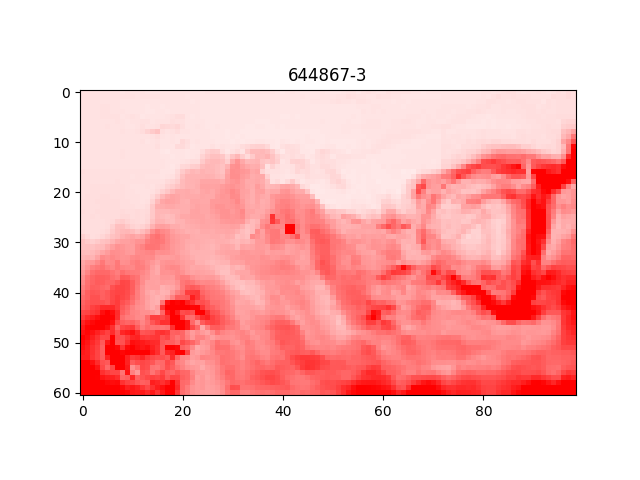

<IPython.core.display.Javascript object>


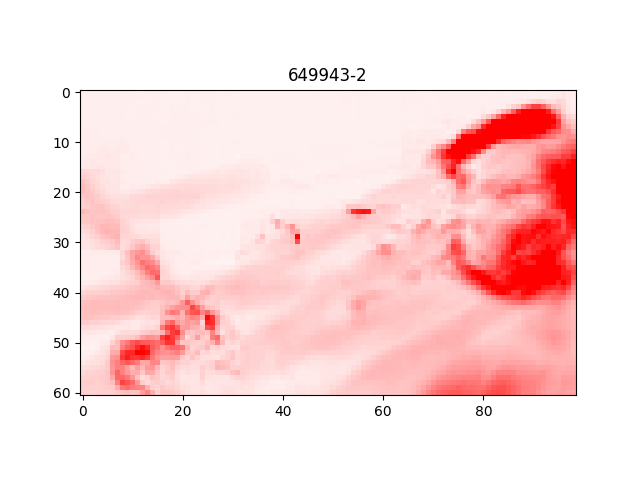

<IPython.core.display.Javascript object>


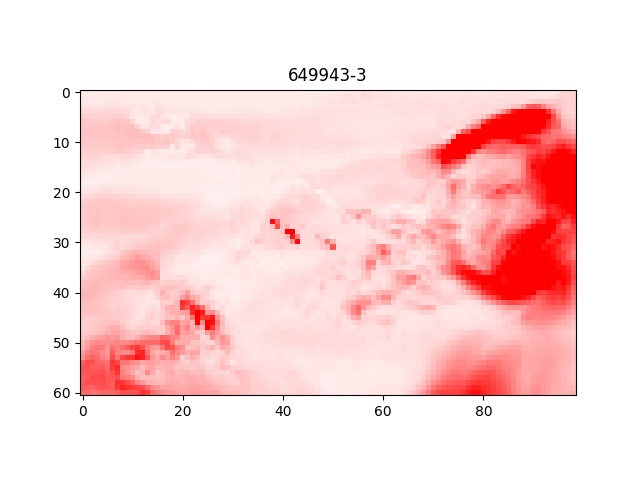

<IPython.core.display.Javascript object>


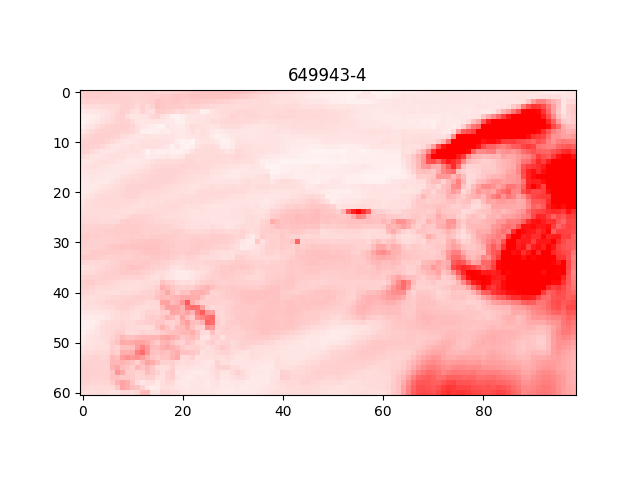

In [920]:

sel_session=0

for sel_session in range(0,len(sessions)):
    if 0 in svc_results_face[sel_session]['block_ids'][0][0]:
        coefs=np.mean(np.vstack(svc_results_face[sel_session]['block_ids'][0][0][0]['coefs']),axis=0)
    else:
        continue

    mm = main_paths[sel_session]
    behav_path=glob.glob(os.path.join(mm,"Behavior_*.npy"))[0]
    behav_info=np.load(behav_path,allow_pickle=True)
    metadata_path = os.path.join(mm,"metadata.pkl")
    with open(metadata_path, 'rb') as handle:
        metadata = pickle.load(handle)

    weighted_mot_masks=np.zeros(behav_info.item()['motMask_reshape'][1].shape)

    for cc,coef in enumerate(coefs):
        weighted_mot_masks[:,:,cc]=np.abs(coef*behav_info.item()['motMask_reshape'][1][:,:,cc])

    fig,ax=plt.subplots(1,1)
    ax.imshow(np.nanmean(weighted_mot_masks,axis=2),cmap='bwr',vmin=-.0005,vmax=.0005)
    ax.set_title(metadata['mouseID']+'-'+str(metadata['ephys_session_num']))
    
# set_range=np.std(weighted_mot_masks)/2

In [ ]:
# fig,ax=plt.subplots(1,1)
# ax.imshow(np.nanmean(weighted_mot_masks,axis=2),cmap='bwr',vmin=-.0005,vmax=.0005)
# ax.set_title(metadata['mouseID']+'-'+str(metadata['ephys_session_num']))

In [921]:
n_units={
    'mouse_session':[],
    'n_units':[],
}
for ss in range(0,len(sessions)):
    n_units['mouse_session'].append(sessions[ss].metadata['mouseID']+'-'+
                                    str(sessions[ss].metadata['ephys_session_num']))
    n_units['n_units'].append(len(sessions[ss].good_units))
    

In [939]:
X.shape

(240, 20)

In [990]:
# clustering
from sklearn.cluster import KMeans

X=np.nanmean(behav_SVD_by_trial,axis=2)

kmeans = KMeans(n_clusters=10, random_state=0,).fit(X.T)

In [999]:
# kmeans.labels_
# import matplotlib.colors as mcolors
kmeans.inertia_

588893.8513625995

In [1000]:
min_clusters=1
max_clusters=50
step_clusters=1

n_clusters=np.arange(min_clusters,max_clusters,step_clusters)
inertia = np.zeros(len(n_clusters))

X=np.nanmean(behav_SVD_by_trial,axis=2)

for ic,cc in enumerate(n_clusters):
    
    kmeans = KMeans(n_clusters=cc, random_state=0,).fit(X.T)
    inertia[ic]=kmeans.inertia_

<IPython.core.display.Javascript object>


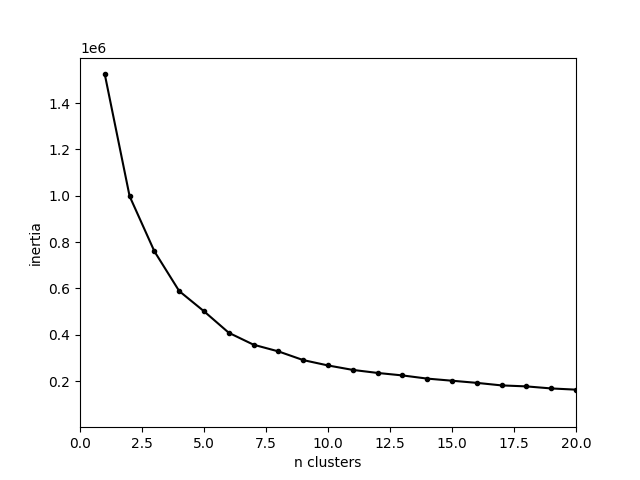

(0.0, 20.0)

In [1008]:
fig,ax=plt.subplots(1,1)
ax.plot(n_clusters,inertia,'k.-')
ax.set_ylabel('inertia')
ax.set_xlabel('n clusters')
ax.set_xlim([0,20])

<IPython.core.display.Javascript object>


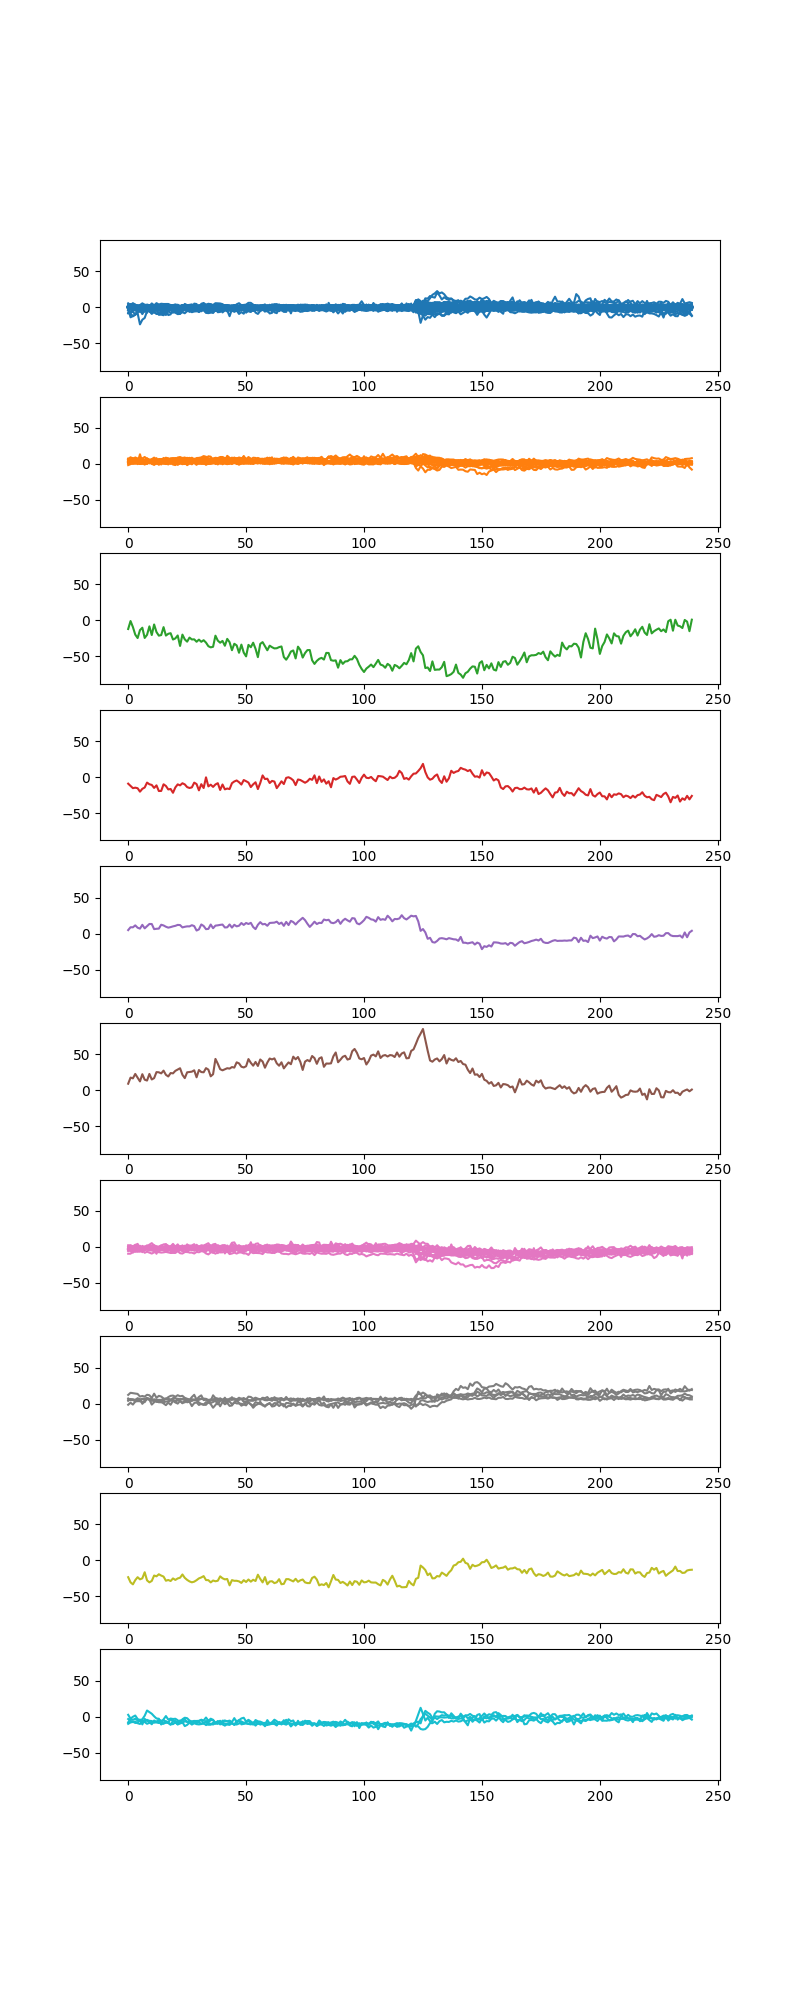

In [1005]:
nclusters=10
colors=list(mcolors.TABLEAU_COLORS)

X=np.nanmean(behav_SVD_by_trial,axis=2)

kmeans = KMeans(n_clusters=nclusters, random_state=0,).fit(X.T)

fig,ax=plt.subplots(nclusters,1,sharey=True,figsize=(8,2*nclusters))
for ix,xx in enumerate(np.unique(kmeans.labels_)):
    
    svd_ind=kmeans.labels_==xx
    
#     mean_svd=np.nanmean(X[:,svd_ind],axis=1)
    
#     ax.plot(mean_svd)
    ax[ix].plot(X[:,svd_ind],color=colors[ix])
    
# ax.legend(np.unique(kmeans.labels_))